<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Welcome to Colaboratory!</h1>


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

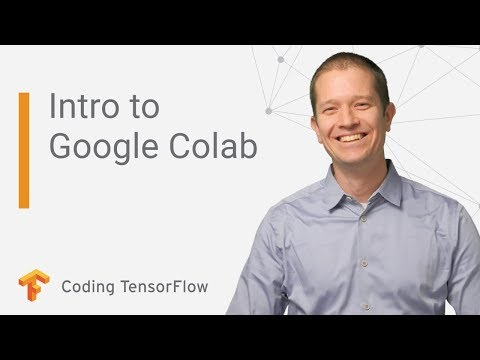

In [0]:
#@title Introducing Colaboratory { display-mode: "form" }
#@markdown This 3-minute video gives an overview of the key features of Colaboratory:
from IPython.display import YouTubeVideo
YouTubeVideo('inN8seMm7UI', width=600, height=400)

## Getting Started

The document you are reading is a  [Jupyter notebook](https://jupyter.org/), hosted in Colaboratory. It is not a static page, but an interactive environment that lets you write and execute code in Python and other languages.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [0]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter".

All cells modify the same global state, so variables that you define by executing a cell can be used in other cells:

In [0]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

For more information about working with Colaboratory notebooks, see [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb).


## More Resources

Learn how to make the most of Python, Jupyter, Colaboratory, and related tools with these resources:

### Working with Notebooks in Colaboratory
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

## Machine Learning Examples: Seedbank

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out the [Seedbank](https://research.google.com/seedbank/) project.

A few featured examples:

- [Neural Style Transfer](https://research.google.com/seedbank/seed/neural_style_transfer_with_tfkeras): Use deep learning to transfer style between images.
- [EZ NSynth](https://research.google.com/seedbank/seed/ez_nsynth): Synthesize audio with WaveNet auto-encoders.
- [Fashion MNIST with Keras and TPUs](https://research.google.com/seedbank/seed/fashion_mnist_with_keras_and_tpus): Classify fashion-related images with deep learning.
- [DeepDream](https://research.google.com/seedbank/seed/deepdream): Produce DeepDream images from your own photos.
- [Convolutional VAE](https://research.google.com/seedbank/seed/convolutional_vae): Create a generative model of handwritten digits.

In [1]:
!pip install tensorflow==2.1.0

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries and packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import cv2  
import keras
import tensorflow.keras.layers as Layers
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
from keras.regularizers import l1
from keras.layers.normalization import BatchNormalization
import tensorflow.keras.metrics as Metrics
from keras.layers import Dropout
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
import seaborn as sn
import timeit
import os
from keras.optimizers import Adam
from random import randint

# Defining paths to tranning and test images.
TRAIN_PATH = "/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_train"
TEST_PATH = "/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test"

Using TensorFlow backend.


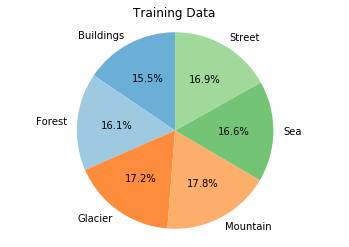

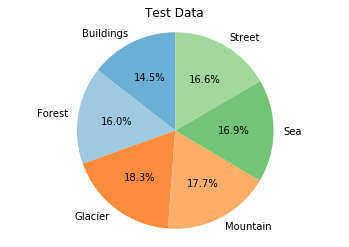

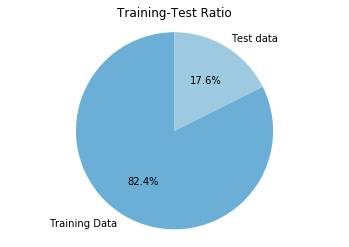

Number of training images: 14126
Number of testing images: 3020
Number of images for prediction: 7311


In [0]:
# Exploratory analysis
def explore_categories(path):
    """This function explores data folders and counts number of landscape category by category."""

    # Counting each iamge category  #path+"/"+"foldername" goes to "foldername"and counts the images
    for category in os.listdir(path):
        if(category == "buildings"):
            no_buildings = len(os.listdir(path + "/" + "buildings"))
        elif(category == "forest"):
            no_forest = len(os.listdir(path + "/" + "forest"))
        elif(category == "glacier"):
            no_glacier = len(os.listdir(path + "/" + "glacier"))  
        elif(category == "mountain"):
            no_mountain = len(os.listdir(path + "/" + "mountain"))
        elif(category == "sea"):
            no_sea = len(os.listdir(path + "/" + "sea"))   
        elif(category == "street"):
            no_street = len(os.listdir(path + "/" + "street"))

    # Summing all images.        
    total_images = no_buildings + no_forest + no_glacier + no_mountain + no_sea + no_street

    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea', 'Street'
    percentages = [no_buildings/total_images, no_forest/total_images, no_glacier/total_images, no_mountain/total_images, no_sea/total_images, no_street/total_images]

    if(path == TEST_PATH):
        pie_chart_generate(percentages, labels, "Test Data")
    elif(path == TRAIN_PATH):
        pie_chart_generate(percentages, labels, "Training Data")
    return total_images


def pie_chart_generate(percentages, labels, title):
 
    # Defining color map for pie chart.
    cmap = plt.get_cmap("tab20c")
    outer_colors = inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.pie(percentages, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=outer_colors)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


# Training data pie chart
number_training_images = explore_categories(TRAIN_PATH)
# Testing data pie chart
number_testing_images = explore_categories(TEST_PATH)

# Pie chart of the ratio of training and testing data
training_testing_ratio = [number_training_images/(number_training_images + number_testing_images), number_testing_images/(number_training_images + number_testing_images)]
pie_chart_generate(training_testing_ratio, ['Training Data', 'Test data'], 'Training-Test Ratio')

print("Number of training images: " + str(number_training_images))
print("Number of testing images: " + str(number_testing_images))
print("Number of images for prediction: " + str(len(os.listdir("/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_pred"))))

In [0]:
#Pre-process data
def pre_process(path, image_size=150):
    """This function loads, resizes, standardizes and shuffles all images."""
    data = []
    labels = []
    for category in os.listdir(path):
        if(category == "buildings"):
            label = 0
        elif(category == "forest"):
            label = 1
        elif(category == "glacier"):
            label = 2  
        elif(category == "mountain"):
            label = 3  
        elif(category == "sea"):
            label = 4   
        elif(category == "street"):
            label = 5

        training_subfolder_path = path + "/" + category

        for file in os.listdir(training_subfolder_path):
            image_path = training_subfolder_path + "/" + file
            image = cv2.imread(image_path)

            #Resize all images so they all have the same size
            image = cv2.resize(image,(image_size, image_size))
            image = np.array(image)

            #Standardize data by dividing by 255
            image = image.astype('float32')/255.0
            data.append(image)
            labels.append(label)

    #Shuffle data
    data, labels = shuffle(data, labels)
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

In [0]:
# Loading data
train_data, labels = pre_process(TRAIN_PATH, image_size=150)

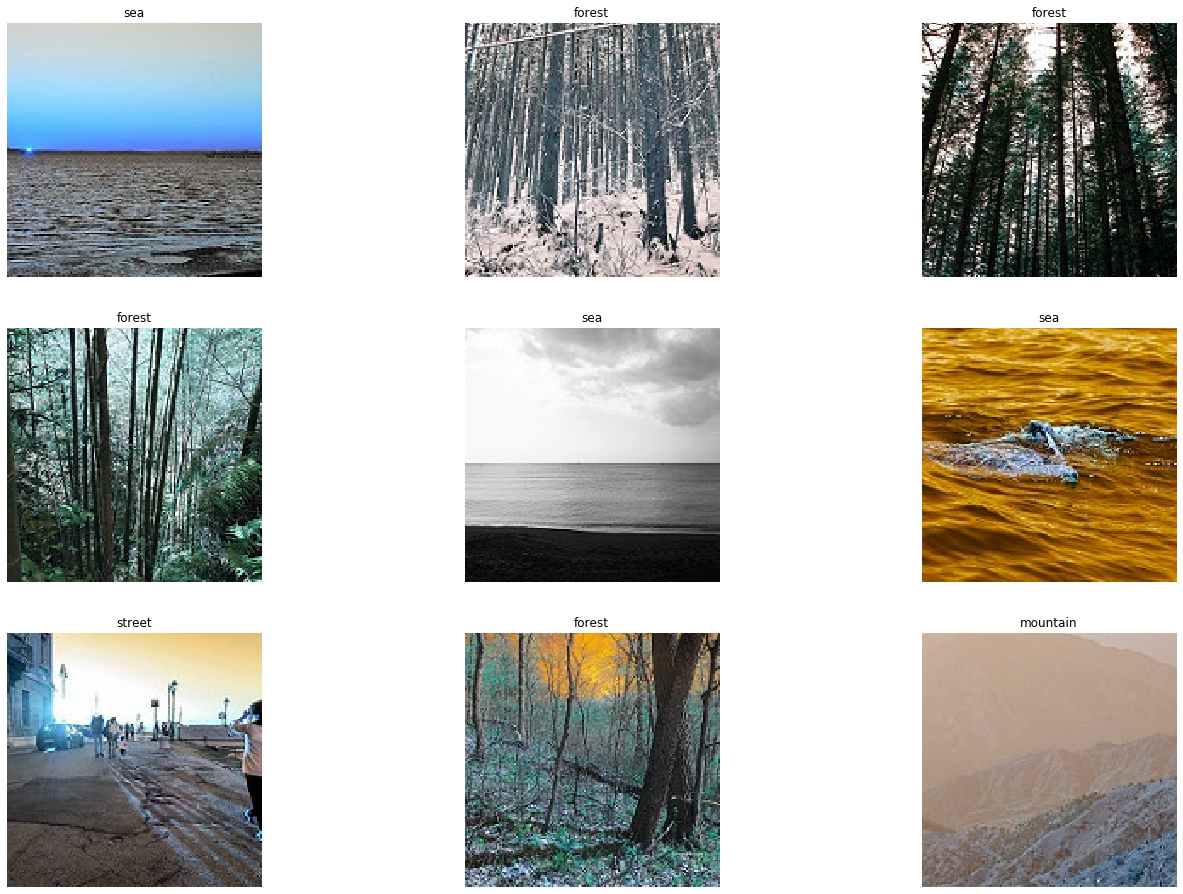

In [0]:
def get_classlabel(class_code):
  
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}  
    return labels[class_code]
# Plotting images with class labels.
f,ax = plt.subplots(3,3)
f.subplots_adjust(0,0,3,3)
for i in range(0,3,1):
    for j in range(0,3,1):
        rnd_number = randint(0,len(train_data))
        ax[i,j].imshow(train_data[rnd_number])
        ax[i,j].set_title(get_classlabel(labels[rnd_number]))
        ax[i,j].axis('off')

In [0]:
# Data Augmentation Section
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util
from skimage.exposure import adjust_gamma

#Defining augmentation operations.
def horizontal_flip(image):
    
    return image[:, ::-1]

def up_side_down(image):
    return np.rot90(image, 2)

# Defining augmentation methods.    
methods={'h_flip':horizontal_flip,'u_s_d':up_side_down}
# Defining data and label lists to append images into.
data = []
labels = []
# Setting the path of data.
path = "/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_train"
for category in os.listdir(path):
    if(category == "buildings"):
        label = 0
    elif(category == "forest"):
        label = 1
    elif(category == "glacier"):
        label = 2  
    elif(category == "mountain"):
        label = 3  
    elif(category == "sea"):
        label = 4   
    elif(category == "street"):
        label = 5

    training_subfolder_path = path + "/" + category        
    for file in os.listdir(training_subfolder_path):
        image_path = training_subfolder_path + "/" + file
        image = cv2.imread(image_path)

        #Resize all images so they all have the same size
        image = cv2.resize(image,(150,150))
        image = np.array(image)

        #Standardize data by dividing by 255
        image = image.astype('float32')/255.0
        data.append(image)
        labels.append(label)

        # Randomly choosing an augmentation operation.
        key = random.choice(list(methods))
        image=methods[key](image)
        data.append(image)
        labels.append(label)


print("Training data", len(data))

#Shuffle data
data, labels = shuffle(data, labels)
data = np.array(data)
labels = np.array(labels)
train_data=data



Training data 28252


In [0]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label == 5
        elif labels == 'mountain':
            label == 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

In [0]:
test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [0]:
نیاز بهاجرا

# 1

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))                  
model.add(tf.keras.layers.Dense(6, activation="sigmoid"))                  

In [0]:
model.compile(loss="sparse_categorical_crossentropy", #categorical_crossentropy#sparse_categorical_crossentropy
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
trained = model.fit(train_data,labels,epochs=1,validation_split=0.25,batch_size=32)

Train on 21189 samples, validate on 7063 samples
21189/21189 [==============================] - 57s 3ms/sample - loss: 1.4695 - accuracy: 0.4137 - val_loss: 1.4623 - val_accuracy: 0.4327


In [0]:
#test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3020/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[9.41574157436952, 0.28013244]

In [0]:
trained = model.fit(train_data,labels,epochs=3,validation_split=0.25,batch_size=32)

Train on 21189 samples, validate on 7063 samples
Epoch 1/3
21189/21189 [==============================] - 56s 3ms/sample - loss: 1.2730 - accuracy: 0.5042 - val_loss: 1.3268 - val_accuracy: 0.4812
Epoch 2/3
21189/21189 [==============================] - 56s 3ms/sample - loss: 1.1994 - accuracy: 0.5338 - val_loss: 1.8345 - val_accuracy: 0.3575
Epoch 3/3
21189/21189 [==============================] - 56s 3ms/sample - loss: 1.1539 - accuracy: 0.5574 - val_loss: 1.2672 - val_accuracy: 0.5025


In [0]:
#test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3020/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[6.454864073747041, 0.33675498]

In [0]:
نیاز نیست

In [0]:
2


### 2

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(100, activation="relu"))                  
model.add(tf.keras.layers.Dense(6, activation="sigmoid"))                  

In [0]:
model.compile(loss="sparse_categorical_crossentropy", #categorical_crossentropy#sparse_categorical_crossentropy
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
trained = model.fit(train_data,labels,epochs=3,validation_split=0.25,batch_size=32)

Train on 21189 samples, validate on 7063 samples
Epoch 1/3
21189/21189 [==============================] - 44s 2ms/sample - loss: 1.5677 - accuracy: 0.3633 - val_loss: 1.4423 - val_accuracy: 0.4243
Epoch 2/3
21189/21189 [==============================] - 43s 2ms/sample - loss: 1.4065 - accuracy: 0.4458 - val_loss: 1.3288 - val_accuracy: 0.4774
Epoch 3/3
21189/21189 [==============================] - 43s 2ms/sample - loss: 1.3465 - accuracy: 0.4728 - val_loss: 1.3501 - val_accuracy: 0.4596


In [0]:
#test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3020/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[6.592488393720412, 0.34602648]

In [0]:
3

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(6, activation="sigmoid"))                  

In [0]:
model.compile(loss="sparse_categorical_crossentropy", #categorical_crossentropy#sparse_categorical_crossentropy
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
model.compile(loss="sparse_categorical_crossentropy", #categorical_crossentropy#sparse_categorical_crossentropy
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
trained = model.fit(train_data,labels,epochs=3,validation_split=0.25,batch_size=32)

Train on 21189 samples, validate on 7063 samples
Epoch 1/3
21189/21189 [==============================] - 44s 2ms/sample - loss: 1.6672 - accuracy: 0.2960 - val_loss: 1.5405 - val_accuracy: 0.3790
Epoch 2/3
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.5311 - accuracy: 0.3793 - val_loss: 1.4374 - val_accuracy: 0.4252
Epoch 3/3
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.4674 - accuracy: 0.4168 - val_loss: 1.3665 - val_accuracy: 0.4542


In [0]:
#test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3020/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[7.255188207436871, 0.28675497]

In [0]:
4

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(6, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
trained = model.fit(train_data,labels,epochs=3,validation_split=0.25,batch_size=32)

Train on 21189 samples, validate on 7063 samples
Epoch 1/3
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.4237 - accuracy: 0.4316 - val_loss: 1.3645 - val_accuracy: 0.4594
Epoch 2/3
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.2508 - accuracy: 0.5131 - val_loss: 1.2970 - val_accuracy: 0.4964
Epoch 3/3
21189/21189 [==============================] - 43s 2ms/sample - loss: 1.1814 - accuracy: 0.5464 - val_loss: 1.3702 - val_accuracy: 0.4269


In [0]:
#test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3020/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[238.85200114471235, 0.34801325]

In [0]:
5

#5

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(6, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
trained = model.fit(train_data,labels,epochs=3,validation_split=0.25,batch_size=32)

Train on 21189 samples, validate on 7063 samples
Epoch 1/3
21189/21189 [==============================] - 43s 2ms/sample - loss: 1.5620 - accuracy: 0.3599 - val_loss: 1.7810 - val_accuracy: 0.2686
Epoch 2/3
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.4201 - accuracy: 0.4301 - val_loss: 1.4716 - val_accuracy: 0.3988
Epoch 3/3
21189/21189 [==============================] - 41s 2ms/sample - loss: 1.3801 - accuracy: 0.4529 - val_loss: 1.3218 - val_accuracy: 0.4603


In [0]:
#test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3020/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[170.8086987830156, 0.29966888]

In [0]:
6

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(6, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
trained = model.fit(train_data,labels,epochs=10,validation_split=0.25,batch_size=32)

Train on 21189 samples, validate on 7063 samples
Epoch 1/10
21189/21189 [==============================] - 43s 2ms/sample - loss: 1.5740 - accuracy: 0.3490 - val_loss: 1.4320 - val_accuracy: 0.4092
Epoch 2/10
21189/21189 [==============================] - 41s 2ms/sample - loss: 1.4163 - accuracy: 0.4320 - val_loss: 1.4022 - val_accuracy: 0.4218
Epoch 3/10
21189/21189 [==============================] - 41s 2ms/sample - loss: 1.3702 - accuracy: 0.4593 - val_loss: 1.2949 - val_accuracy: 0.5005
Epoch 4/10
21189/21189 [==============================] - 41s 2ms/sample - loss: 1.3315 - accuracy: 0.4760 - val_loss: 1.2689 - val_accuracy: 0.5063
Epoch 5/10
21189/21189 [==============================] - 41s 2ms/sample - loss: 1.3095 - accuracy: 0.4870 - val_loss: 1.2749 - val_accuracy: 0.5090
Epoch 6/10
21189/21189 [==============================] - 41s 2ms/sample - loss: 1.2869 - accuracy: 0.4990 - val_loss: 1.2576 - val_accuracy: 0.5169
Epoch 7/10
21189/21189 [==============================] -

In [0]:
#test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3020/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[158.77420632065525, 0.3254967]

In [0]:
7

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(6, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
trained = model.fit(train_data,labels,epochs=3,validation_split=0.25,batch_size=32)

Train on 21189 samples, validate on 7063 samples
Epoch 1/3
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.7566 - accuracy: 0.2286 - val_loss: 1.6410 - val_accuracy: 0.3583
Epoch 2/3
21189/21189 [==============================] - 41s 2ms/sample - loss: 1.5977 - accuracy: 0.3265 - val_loss: 1.8935 - val_accuracy: 0.2338
Epoch 3/3
21189/21189 [==============================] - 41s 2ms/sample - loss: 1.5271 - accuracy: 0.3775 - val_loss: 1.9620 - val_accuracy: 0.2595


In [0]:
#test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3020/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[370.8283690193631, 0.16258278]

In [0]:
8

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(6, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
trained = model.fit(train_data,labels,epochs=10,validation_split=0.25,batch_size=32)

Train on 21189 samples, validate on 7063 samples
Epoch 1/10
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.7495 - accuracy: 0.2360 - val_loss: 1.5681 - val_accuracy: 0.3690
Epoch 2/10
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.6251 - accuracy: 0.3081 - val_loss: 1.4589 - val_accuracy: 0.4221
Epoch 3/10
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.5739 - accuracy: 0.3291 - val_loss: 1.4295 - val_accuracy: 0.4449
Epoch 4/10
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.5181 - accuracy: 0.3702 - val_loss: 1.5217 - val_accuracy: 0.4092
Epoch 5/10
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.4891 - accuracy: 0.4050 - val_loss: 1.3754 - val_accuracy: 0.4491
Epoch 6/10
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.4597 - accuracy: 0.4187 - val_loss: 1.3575 - val_accuracy: 0.4890
Epoch 7/10
21189/21189 [==============================] -

In [0]:
#test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3020/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[100.15229269874017, 0.26556292]

In [0]:
9

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))

model.add(tf.keras.layers.Dense(100, activation="relu"))

model.add(tf.keras.layers.Dense(6, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
trained = model.fit(train_data,labels,epochs=10,validation_split=0.25,batch_size=32)

Train on 21189 samples, validate on 7063 samples
Epoch 1/10
21189/21189 [==============================] - 43s 2ms/sample - loss: 1.4265 - accuracy: 0.4357 - val_loss: 1.7903 - val_accuracy: 0.3487
Epoch 2/10
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.2391 - accuracy: 0.5180 - val_loss: 1.3675 - val_accuracy: 0.4686
Epoch 3/10
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.1782 - accuracy: 0.5446 - val_loss: 1.2987 - val_accuracy: 0.4838
Epoch 4/10
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.1341 - accuracy: 0.5615 - val_loss: 1.3764 - val_accuracy: 0.4885
Epoch 5/10
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.0998 - accuracy: 0.5780 - val_loss: 1.2376 - val_accuracy: 0.5120
Epoch 6/10
21189/21189 [==============================] - 43s 2ms/sample - loss: 1.0706 - accuracy: 0.5883 - val_loss: 1.2796 - val_accuracy: 0.4880
Epoch 7/10
21189/21189 [==============================] -

In [0]:
#test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3020/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[310.3138854980469, 0.35430464]

In [0]:
10

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))

model.add(tf.keras.layers.Dense(100, activation="relu"))

model.add(tf.keras.layers.Dense(6, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
trained = model.fit(train_data,labels,epochs=32,validation_split=0.25,batch_size=32)

Train on 21189 samples, validate on 7063 samples
Epoch 1/32
21189/21189 [==============================] - 43s 2ms/sample - loss: 1.4190 - accuracy: 0.4413 - val_loss: 1.4855 - val_accuracy: 0.3823
Epoch 2/32
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.2425 - accuracy: 0.5170 - val_loss: 1.4043 - val_accuracy: 0.4753
Epoch 3/32
21189/21189 [==============================] - 41s 2ms/sample - loss: 1.1771 - accuracy: 0.5469 - val_loss: 1.3008 - val_accuracy: 0.4769
Epoch 4/32
21189/21189 [==============================] - 41s 2ms/sample - loss: 1.1372 - accuracy: 0.5622 - val_loss: 1.2721 - val_accuracy: 0.5045
Epoch 5/32
21189/21189 [==============================] - 41s 2ms/sample - loss: 1.1015 - accuracy: 0.5767 - val_loss: 1.3657 - val_accuracy: 0.4468
Epoch 6/32
21189/21189 [==============================] - 41s 2ms/sample - loss: 1.0749 - accuracy: 0.5902 - val_loss: 1.1995 - val_accuracy: 0.5476
Epoch 7/32
21189/21189 [==============================] -

In [0]:
#test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3020/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[464.70071694077245, 0.3768212]

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(6, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
trained = model.fit(train_data,labels,epochs=32,validation_split=0.25,batch_size=32)

Train on 21189 samples, validate on 7063 samples
Epoch 1/32
21189/21189 [==============================] - 43s 2ms/sample - loss: 1.5615 - accuracy: 0.3646 - val_loss: 1.4229 - val_accuracy: 0.4154
Epoch 2/32
21189/21189 [==============================] - 43s 2ms/sample - loss: 1.4057 - accuracy: 0.4382 - val_loss: 1.3609 - val_accuracy: 0.4238
Epoch 3/32
21189/21189 [==============================] - 43s 2ms/sample - loss: 1.3603 - accuracy: 0.4607 - val_loss: 1.3487 - val_accuracy: 0.4518
Epoch 4/32
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.3300 - accuracy: 0.4771 - val_loss: 1.5500 - val_accuracy: 0.3840
Epoch 5/32
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.3057 - accuracy: 0.4887 - val_loss: 1.2911 - val_accuracy: 0.5125
Epoch 6/32
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.2831 - accuracy: 0.5029 - val_loss: 1.2706 - val_accuracy: 0.5128
Epoch 7/32
21189/21189 [==============================] -

In [0]:
#test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=2)

3020/1 - 2s - loss: 166.4680 - accuracy: 0.3586


[163.58154812238075, 0.35860926]

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(6, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
trained = model.fit(train_data,labels,epochs=32,validation_split=0.25,batch_size=32)

Train on 21189 samples, validate on 7063 samples
Epoch 1/32
21189/21189 [==============================] - 43s 2ms/sample - loss: 1.7564 - accuracy: 0.2492 - val_loss: 1.6615 - val_accuracy: 0.3491
Epoch 2/32
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.6173 - accuracy: 0.3381 - val_loss: 1.5570 - val_accuracy: 0.3599
Epoch 3/32
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.5678 - accuracy: 0.3578 - val_loss: 2.5154 - val_accuracy: 0.2128
Epoch 4/32
21189/21189 [==============================] - 42s 2ms/sample - loss: 1.5472 - accuracy: 0.3862 - val_loss: 1.4630 - val_accuracy: 0.4151
Epoch 5/32
21189/21189 [==============================] - 43s 2ms/sample - loss: 1.5053 - accuracy: 0.3939 - val_loss: 2.2775 - val_accuracy: 0.2093
Epoch 6/32
21189/21189 [==============================] - 43s 2ms/sample - loss: 1.4843 - accuracy: 0.4065 - val_loss: 1.3929 - val_accuracy: 0.4781
Epoch 7/32
21189/21189 [==============================] -

In [0]:
#test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3020/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[123.11763829111264, 0.29503313]

In [0]:
11

11

# 11

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))

model.add(tf.keras.layers.Dense(100, activation="relu"))

model.add(tf.keras.layers.Dense(6, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
trained = model.fit(train_data,labels,epochs=32)

Train on 28252 samples
Epoch 1/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.3952 - accuracy: 0.4496
Epoch 2/32
28252/28252 [==============================] - 50s 2ms/sample - loss: 1.2143 - accuracy: 0.5293
Epoch 3/32
28252/28252 [==============================] - 49s 2ms/sample - loss: 1.1506 - accuracy: 0.5584
Epoch 4/32
28252/28252 [==============================] - 49s 2ms/sample - loss: 1.1141 - accuracy: 0.5740
Epoch 5/32
28252/28252 [==============================] - 49s 2ms/sample - loss: 1.0807 - accuracy: 0.5878
Epoch 6/32
28252/28252 [==============================] - 48s 2ms/sample - loss: 1.0513 - accuracy: 0.6009
Epoch 7/32
28252/28252 [==============================] - 48s 2ms/sample - loss: 1.0242 - accuracy: 0.6128
Epoch 8/32
28252/28252 [==============================] - 48s 2ms/sample - loss: 0.9996 - accuracy: 0.6208
Epoch 9/32
28252/28252 [==============================] - 48s 2ms/sample - loss: 0.9780 - accuracy: 0.6323
Epoch 10/32
28

In [0]:
#test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3020/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[438.514683926816, 0.39536422]

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(6, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
trained = model.fit(train_data,labels,epochs=32)

Train on 28252 samples
Epoch 1/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.5275 - accuracy: 0.3752
Epoch 2/32
28252/28252 [==============================] - 50s 2ms/sample - loss: 1.3947 - accuracy: 0.4403
Epoch 3/32
28252/28252 [==============================] - 50s 2ms/sample - loss: 1.3418 - accuracy: 0.4705
Epoch 4/32
28252/28252 [==============================] - 49s 2ms/sample - loss: 1.3069 - accuracy: 0.4874
Epoch 5/32
28252/28252 [==============================] - 50s 2ms/sample - loss: 1.2817 - accuracy: 0.5005
Epoch 6/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.2613 - accuracy: 0.5076
Epoch 7/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.2427 - accuracy: 0.5157
Epoch 8/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.2278 - accuracy: 0.5248
Epoch 9/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.2211 - accuracy: 0.5283
Epoch 10/32
28

In [0]:
#test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3020/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[193.50119006428497, 0.3182119]

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(6, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
trained = model.fit(train_data,labels,epochs=32)

Train on 28252 samples
Epoch 1/32
28252/28252 [==============================] - 52s 2ms/sample - loss: 1.6922 - accuracy: 0.2752
Epoch 2/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.5272 - accuracy: 0.3653
Epoch 3/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.4755 - accuracy: 0.3948
Epoch 4/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.4510 - accuracy: 0.4175
Epoch 5/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.4366 - accuracy: 0.4227
Epoch 6/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.4294 - accuracy: 0.4296
Epoch 7/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.4216 - accuracy: 0.4268
Epoch 8/32
28252/28252 [==============================] - 52s 2ms/sample - loss: 1.4125 - accuracy: 0.4355
Epoch 9/32
28252/28252 [==============================] - 52s 2ms/sample - loss: 1.4074 - accuracy: 0.4395
Epoch 10/32
28

In [0]:
#test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3020/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[101.88017957068438, 0.32913908]

In [0]:
12

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(60, activation="relu"))
model.add(tf.keras.layers.Dense(6, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
trained = model.fit(train_data,labels,epochs=32)

Train on 28252 samples
Epoch 1/32
28252/28252 [==============================] - 52s 2ms/sample - loss: 1.4052 - accuracy: 0.4412
Epoch 2/32
28252/28252 [==============================] - 52s 2ms/sample - loss: 1.2225 - accuracy: 0.5288
Epoch 3/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.1537 - accuracy: 0.5538
Epoch 4/32
28252/28252 [==============================] - 50s 2ms/sample - loss: 1.1100 - accuracy: 0.5724
Epoch 5/32
28252/28252 [==============================] - 50s 2ms/sample - loss: 1.0731 - accuracy: 0.5895
Epoch 6/32
28252/28252 [==============================] - 50s 2ms/sample - loss: 1.0445 - accuracy: 0.6022
Epoch 7/32
28252/28252 [==============================] - 50s 2ms/sample - loss: 1.0161 - accuracy: 0.6123
Epoch 8/32
28252/28252 [==============================] - 50s 2ms/sample - loss: 0.9936 - accuracy: 0.6205
Epoch 9/32
28252/28252 [==============================] - 50s 2ms/sample - loss: 0.9712 - accuracy: 0.6292
Epoch 10/32
28

In [0]:
#test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3020/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[493.21237748506053, 0.37748346]

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(60, activation="relu"))
model.add(tf.keras.layers.Dense(6, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
trained = model.fit(train_data,labels,epochs=32)

Train on 28252 samples
Epoch 1/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.5412 - accuracy: 0.3712
Epoch 2/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.3591 - accuracy: 0.4644
Epoch 3/32
28252/28252 [==============================] - 50s 2ms/sample - loss: 1.3001 - accuracy: 0.4938
Epoch 4/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.2538 - accuracy: 0.5114
Epoch 5/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.2242 - accuracy: 0.5264
Epoch 6/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.1982 - accuracy: 0.5377
Epoch 7/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.1710 - accuracy: 0.5476
Epoch 8/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.1566 - accuracy: 0.5544
Epoch 9/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.1344 - accuracy: 0.5636
Epoch 10/32
28

In [0]:
#test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3020/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[205.08957939905835, 0.39834437]

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(60, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(6, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
trained = model.fit(train_data,labels,epochs=32)

Train on 28252 samples
Epoch 1/32
28252/28252 [==============================] - 52s 2ms/sample - loss: 1.6789 - accuracy: 0.2853
Epoch 2/32
28252/28252 [==============================] - 51s 2ms/sample - loss: 1.4908 - accuracy: 0.4032
Epoch 3/32
28252/28252 [==============================] - 50s 2ms/sample - loss: 1.4003 - accuracy: 0.4513
Epoch 4/32
28252/28252 [==============================] - 50s 2ms/sample - loss: 1.3567 - accuracy: 0.4737
Epoch 5/32
28252/28252 [==============================] - 50s 2ms/sample - loss: 1.3179 - accuracy: 0.4905
Epoch 6/32
28252/28252 [==============================] - 50s 2ms/sample - loss: 1.2931 - accuracy: 0.5011
Epoch 7/32
28252/28252 [==============================] - 50s 2ms/sample - loss: 1.2654 - accuracy: 0.5161
Epoch 8/32
28252/28252 [==============================] - 50s 2ms/sample - loss: 1.2476 - accuracy: 0.5225
Epoch 9/32
28252/28252 [==============================] - 50s 2ms/sample - loss: 1.2288 - accuracy: 0.5321
Epoch 10/32
28

In [0]:
#test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3020/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[168.62840931873447, 0.3576159]

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(60, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(6, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
trained = model.fit(train_data,labels,epochs=32)

Train on 28252 samples
Epoch 1/32
28252/28252 [==============================] - 67s 2ms/sample - loss: 1.8218 - accuracy: 0.1773
Epoch 2/32
28252/28252 [==============================] - 66s 2ms/sample - loss: 1.7914 - accuracy: 0.1773
Epoch 3/32
28252/28252 [==============================] - 66s 2ms/sample - loss: 1.7908 - accuracy: 0.1798
Epoch 4/32
28252/28252 [==============================] - 67s 2ms/sample - loss: 1.7811 - accuracy: 0.1989
Epoch 5/32
28252/28252 [==============================] - 67s 2ms/sample - loss: 1.7594 - accuracy: 0.2225
Epoch 6/32
28252/28252 [==============================] - 67s 2ms/sample - loss: 1.7410 - accuracy: 0.2378
Epoch 7/32
28252/28252 [==============================] - 67s 2ms/sample - loss: 1.7205 - accuracy: 0.2510
Epoch 8/32
28252/28252 [==============================] - 67s 2ms/sample - loss: 1.6956 - accuracy: 0.2574
Epoch 9/32
28252/28252 [==============================] - 67s 2ms/sample - loss: 1.6798 - accuracy: 0.2612
Epoch 10/32
28

In [0]:
#test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3020/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[35.28763003317726, 0.26821193]



```

```

# 13

In [0]:
اجرا شود

In [0]:
from keras.regularizers import l2

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(60, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(6, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
trained = model.fit(train_data,labels,epochs=32)

Train on 14126 samples
Epoch 1/32
14126/14126 [==============================] - 95s 7ms/sample - loss: 7.1914 - accuracy: 0.2682
Epoch 2/32
14126/14126 [==============================] - 94s 7ms/sample - loss: 6.1130 - accuracy: 0.3899
Epoch 3/32
14126/14126 [==============================] - 95s 7ms/sample - loss: 5.3028 - accuracy: 0.4303
Epoch 4/32
14126/14126 [==============================] - 95s 7ms/sample - loss: 4.6473 - accuracy: 0.4514
Epoch 5/32
14126/14126 [==============================] - 95s 7ms/sample - loss: 4.1056 - accuracy: 0.4602
Epoch 6/32
14126/14126 [==============================] - 95s 7ms/sample - loss: 3.6530 - accuracy: 0.4734
Epoch 7/32
14126/14126 [==============================] - 94s 7ms/sample - loss: 3.2576 - accuracy: 0.4828
Epoch 8/32
14126/14126 [==============================] - 94s 7ms/sample - loss: 2.9490 - accuracy: 0.4861
Epoch 9/32
14126/14126 [==============================] - 94s 7ms/sample - loss: 2.6601 - accuracy: 0.5015
Epoch 10/32
14

In [0]:
test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images ,test_labels, verbose=0)

[209.8005428086843, 0.2754967]

In [0]:
from keras.regularizers import l2
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(60, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(6, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
trained = model.fit(train_data,labels,epochs=32)

Train on 28252 samples
Epoch 1/32
28252/28252 [==============================] - 77s 3ms/sample - loss: 9.4345 - accuracy: 0.3018
Epoch 2/32
28252/28252 [==============================] - 76s 3ms/sample - loss: 6.9437 - accuracy: 0.4258
Epoch 3/32
28252/28252 [==============================] - 76s 3ms/sample - loss: 5.2513 - accuracy: 0.4641
Epoch 4/32
28252/28252 [==============================] - 76s 3ms/sample - loss: 4.0934 - accuracy: 0.4829
Epoch 5/32
28252/28252 [==============================] - 76s 3ms/sample - loss: 3.2647 - accuracy: 0.4970
Epoch 6/32
28252/28252 [==============================] - 76s 3ms/sample - loss: 2.6948 - accuracy: 0.5109
Epoch 7/32
28252/28252 [==============================] - 76s 3ms/sample - loss: 2.2884 - accuracy: 0.5164
Epoch 8/32
28252/28252 [==============================] - 76s 3ms/sample - loss: 2.0082 - accuracy: 0.5155
Epoch 9/32
28252/28252 [==============================] - 76s 3ms/sample - loss: 1.8060 - accuracy: 0.5233
Epoch 10/32
28

In [0]:
test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images ,test_labels, verbose=0)

[184.24232881053393, 0.28178808]

Train on 14126 samples
14126/14126 [==============================] - 49s 3ms/sample - loss: 1.6077 - accuracy: 0.3991
Train on 14126 samples
14126/14126 [==============================] - 92s 7ms/sample - loss: 29.8479 - accuracy: 0.3886


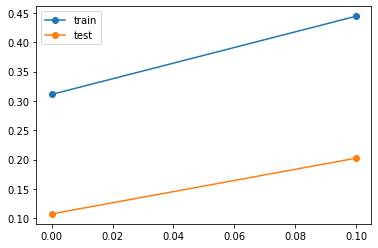

In [0]:
# grid search values
from keras.regularizers import l2
from matplotlib import pyplot
values = [0,1e-1]  #, 1e-2, 1e-3

all_train, all_test = list(), list()
for param in values:
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(300, activation="relu",kernel_regularizer=l2(param)))
   # model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(param)))
   # model.add(tf.keras.layers.Dropout(rate=0.5))
    #model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(param)))
    #model.add(tf.keras.layers.Dense(60, activation="relu",kernel_regularizer=l2(param)))
    #model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(6, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
    model.fit(train_data,labels,epochs=1)
    _,train_acc = model.evaluate(train_data,labels, verbose=0)
    _,test_acc = model.evaluate(test_images, test_labels, verbose=0)
    #print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc))
    all_train.append(train_acc)
    all_test.append(test_acc)
# plot train and test means
pyplot.plot(values, all_train, label='train', marker='o')
pyplot.plot(values, all_test, label='test', marker='o')
pyplot.legend()
pyplot.show()


Train on 14126 samples
14126/14126 [==============================] - 51s 4ms/sample - loss: 1.5006 - accuracy: 0.4095
Train on 14126 samples
14126/14126 [==============================] - 52s 4ms/sample - loss: 8.5847 - accuracy: 0.4172
Train on 14126 samples
14126/14126 [==============================] - 97s 7ms/sample - loss: 29.6667 - accuracy: 0.4039
Train on 14126 samples
14126/14126 [==============================] - 97s 7ms/sample - loss: 36.6891 - accuracy: 0.4056


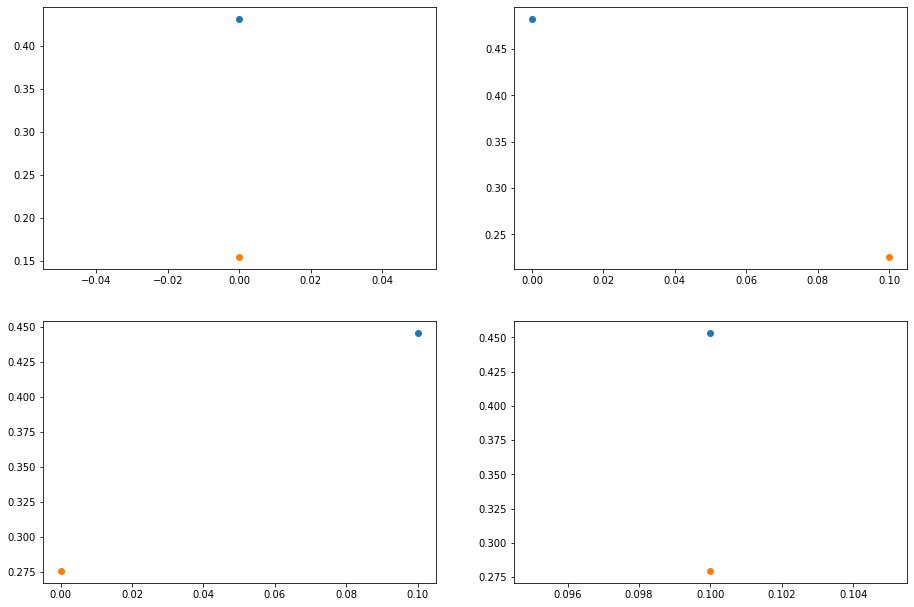

In [0]:
# grid search values
from keras.regularizers import l2
from matplotlib import pyplot
f,ax = plt.subplots(2,2)
f.subplots_adjust(0,0,2,2)
values = [0,1e-1]  #, 1e-2, 1e-3
i=-1
for parama in values:
    i=i+1
    j=0
    for paramb in values:
        all_train, all_test = list(), list()
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(300, activation="relu",kernel_regularizer=l2(parama)))
        model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(paramb)))
        #model.add(tf.keras.layers.Dropout(rate=0.5))
        #model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(param)))
        #model.add(tf.keras.layers.Dense(60, activation="relu",kernel_regularizer=l2(param)))
        #model.add(tf.keras.layers.Dropout(rate=0.5))
        model.add(tf.keras.layers.Dense(6, activation="softmax"))
        model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
        
        model.fit(train_data,labels,epochs=1)
        _,train_acc = model.evaluate(train_data,labels, verbose=0)
        _,test_acc = model.evaluate(test_images, test_labels, verbose=0)
        all_train.append(train_acc)
        all_test.append(test_acc)
        ax[i,j].plot(parama, all_train, label="train", marker='o')
        ax[i,j].plot(paramb, all_test, label="test", marker='o')
        j=j+1

Train on 14126 samples
Epoch 1/5
14126/14126 [==============================] - 52s 4ms/sample - loss: 1.4747 - accuracy: 0.4143
Epoch 2/5
14126/14126 [==============================] - 51s 4ms/sample - loss: 1.2642 - accuracy: 0.5083
Epoch 3/5
14126/14126 [==============================] - 51s 4ms/sample - loss: 1.1905 - accuracy: 0.5382
Epoch 4/5
14126/14126 [==============================] - 52s 4ms/sample - loss: 1.1379 - accuracy: 0.5583
Epoch 5/5
14126/14126 [==============================] - 51s 4ms/sample - loss: 1.0984 - accuracy: 0.5762
Train on 14126 samples
Epoch 1/5
14126/14126 [==============================] - 52s 4ms/sample - loss: 6.1701 - accuracy: 0.4135
Epoch 2/5
14126/14126 [==============================] - 51s 4ms/sample - loss: 2.0959 - accuracy: 0.5092
Epoch 3/5
14126/14126 [==============================] - 51s 4ms/sample - loss: 1.3742 - accuracy: 0.5374
Epoch 4/5
14126/14126 [==============================] - 52s 4ms/sample - loss: 1.2186 - accuracy: 0.5610


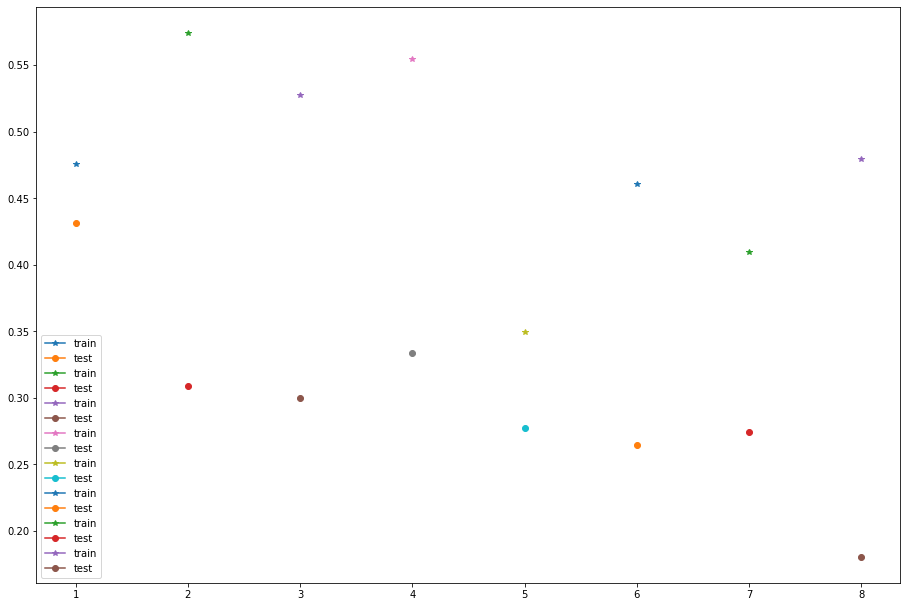

In [0]:
# grid search values
from keras.regularizers import l2
from matplotlib import pyplot
f,ax = plt.subplots(1,1)
f.subplots_adjust(0,0,2,2)
values = [0,1e-1]  #, 1e-2, 1e-3
i=-1
d=1
for parama in values:
    i=i+1
    j=0
    for paramb in values:
        for paramc in values:
            all_train, all_test = list(), list()
            model = tf.keras.models.Sequential()
            model.add(tf.keras.layers.Flatten())
            model.add(tf.keras.layers.Dense(300, activation="relu",kernel_regularizer=l2(parama)))
            model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(paramb)))
            #model.add(tf.keras.layers.Dropout(rate=0.5))
            model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(paramc)))
            #model.add(tf.keras.layers.Dense(60, activation="relu",kernel_regularizer=l2(param)))
            #model.add(tf.keras.layers.Dropout(rate=0.5))
            model.add(tf.keras.layers.Dense(6, activation="softmax"))
            model.compile(loss="sparse_categorical_crossentropy",
                             optimizer="sgd",
                              metrics=["accuracy"])
        
            model.fit(train_data,labels,epochs=5)
            _,train_acc = model.evaluate(train_data,labels, verbose=0)
            _,test_acc = model.evaluate(test_images, test_labels, verbose=0)
            all_train.append(train_acc)
            all_test.append(test_acc)
            ax.plot(d, all_train, label="train", marker='*')
            ax.plot(d, all_test, label="test", marker='o')
            ax.legend(loc="best")

            j=j+1
            d=d+1

In [0]:
# grid search values l2 for augmented
from keras.regularizers import l2
from matplotlib import pyplot
f,ax = plt.subplots(1,1)
f.subplots_adjust(0,0,2,2)
values = [0,1e-1,1e-2]  #, 1e-2, 1e-3
i=-1
d=1
for parama in values:
    i=i+1
    j=0
    for paramb in values:
        for paramc in values:
            all_train, all_test = list(), list()
            model = tf.keras.models.Sequential()
            model.add(tf.keras.layers.Flatten())
            model.add(tf.keras.layers.Dense(300, activation="relu",kernel_regularizer=l2(parama)))
            model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(paramb)))
            #model.add(tf.keras.layers.Dropout(rate=0.5))
            model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(paramc)))
            #model.add(tf.keras.layers.Dense(60, activation="relu",kernel_regularizer=l2(param)))
            #model.add(tf.keras.layers.Dropout(rate=0.5))
            model.add(tf.keras.layers.Dense(6, activation="softmax"))
            model.compile(loss="sparse_categorical_crossentropy",
                             optimizer="sgd",
                              metrics=["accuracy"])
        
            model.fit(train_data,labels,epochs=16,validation_split=.1)
            _,train_acc = model.evaluate(train_data,labels, verbose=0)
            _,test_acc = model.evaluate(test_images, test_labels, verbose=0)
            all_train.append(train_acc)
            all_test.append(test_acc)
            ax.plot(d, all_train, label="train", marker='*')
            ax.plot(d, all_test, label="test", marker='o')
            ax.legend(loc="best")

            j=j+1
            d=d+1

Train on 25426 samples, validate on 2826 samples
Epoch 1/16
25426/25426 [==============================] - 55s 2ms/sample - loss: 1.4263 - accuracy: 0.4288 - val_loss: 1.3995 - val_accuracy: 0.4413
Epoch 2/16
25426/25426 [==============================] - 54s 2ms/sample - loss: 1.2348 - accuracy: 0.5221 - val_loss: 1.2142 - val_accuracy: 0.5258
Epoch 3/16
25426/25426 [==============================] - 54s 2ms/sample - loss: 1.1657 - accuracy: 0.5483 - val_loss: 1.2273 - val_accuracy: 0.5195
Epoch 4/16
25426/25426 [==============================] - 54s 2ms/sample - loss: 1.1224 - accuracy: 0.5688 - val_loss: 1.1888 - val_accuracy: 0.5488
Epoch 5/16
25426/25426 [==============================] - 54s 2ms/sample - loss: 1.0828 - accuracy: 0.5839 - val_loss: 1.2357 - val_accuracy: 0.5354
Epoch 6/16
25426/25426 [==============================] - 54s 2ms/sample - loss: 1.0548 - accuracy: 0.5960 - val_loss: 1.3280 - val_accuracy: 0.5035
Epoch 7/16
25426/25426 [==============================] -

In [0]:
for augmented اجرا شود فقط این پایینی

Train on 28252 samples
28252/28252 [==============================] - 45s 2ms/sample - loss: 1.4366 - accuracy: 0.4349
Train on 28252 samples
28252/28252 [==============================] - 45s 2ms/sample - loss: 5.5474 - accuracy: 0.4383
Train on 28252 samples
28252/28252 [==============================] - 79s 3ms/sample - loss: 17.9857 - accuracy: 0.4177
Train on 28252 samples
28252/28252 [==============================] - 78s 3ms/sample - loss: 22.1392 - accuracy: 0.4144


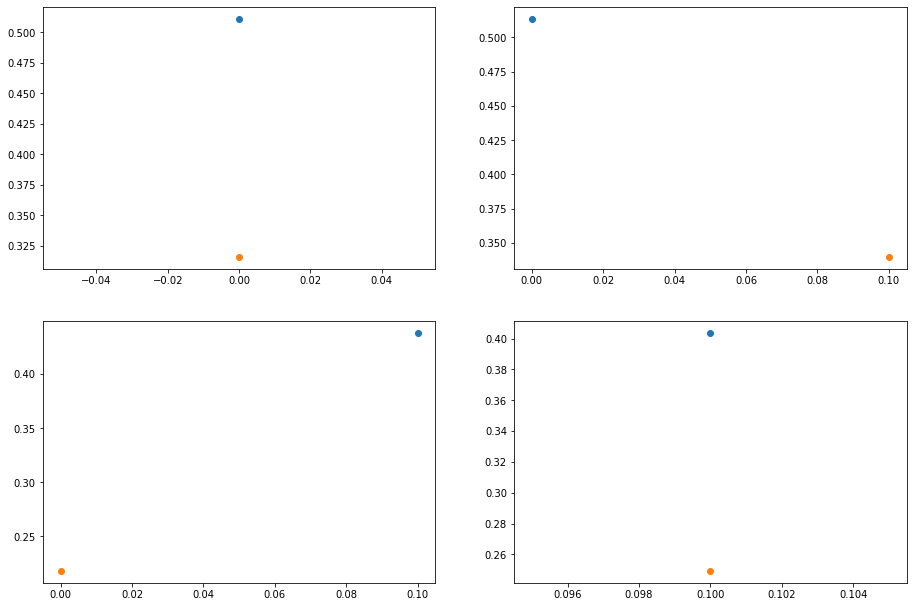

In [0]:
# grid search values
from keras.regularizers import l2
from matplotlib import pyplot
f,ax = plt.subplots(2,2)
f.subplots_adjust(0,0,2,2)
values = [0,1e-1]  #, 1e-2, 1e-3
i=-1
for parama in values:
    i=i+1
    j=0
    for paramb in values:
        all_train, all_test = list(), list()
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(300, activation="relu",kernel_regularizer=l2(parama)))
        model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(paramb)))
        #model.add(tf.keras.layers.Dropout(rate=0.5))
        #model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(param)))
        #model.add(tf.keras.layers.Dense(60, activation="relu",kernel_regularizer=l2(param)))
        #model.add(tf.keras.layers.Dropout(rate=0.5))
        model.add(tf.keras.layers.Dense(6, activation="softmax"))
        model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
        
        model.fit(train_data,labels,epochs=1)
        _,train_acc = model.evaluate(train_data,labels, verbose=0)
        _,test_acc = model.evaluate(test_images, test_labels, verbose=0)
        all_train.append(train_acc)
        all_test.append(test_acc)
        ax[i,j].plot(parama, all_train, label="train", marker='o')
        ax[i,j].plot(paramb, all_test, label="test", marker='o')
        j=j+1

In [0]:
from keras.regularizers import l2

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(6, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2, verbose=2, mode='auto',  restore_best_weights=True)
trained = model.fit(train_data,labels,epochs=32,callbacks=[ early_stopping_cb])

Train on 28252 samples
Epoch 1/32
28252/28252 [==============================] - 77s 3ms/sample - loss: 6.5772 - accuracy: 0.3046
Epoch 2/32
28252/28252 [==============================] - 78s 3ms/sample - loss: 4.8525 - accuracy: 0.4609
Epoch 3/32
28252/28252 [==============================] - 77s 3ms/sample - loss: 3.7373 - accuracy: 0.5000
Epoch 4/32
28252/28252 [==============================] - 77s 3ms/sample - loss: 2.9749 - accuracy: 0.5171
Epoch 5/32
28252/28252 [==============================] - 77s 3ms/sample - loss: 2.4370 - accuracy: 0.5357
Epoch 6/32
28252/28252 [==============================] - 77s 3ms/sample - loss: 2.0606 - accuracy: 0.5484
Epoch 7/32
28252/28252 [==============================] - 77s 3ms/sample - loss: 1.7899 - accuracy: 0.5623
Epoch 8/32
28252/28252 [==============================] - 78s 3ms/sample - loss: 1.6058 - accuracy: 0.5688
Epoch 9/32
28252/28252 [==============================] - 77s 3ms/sample - loss: 1.4686 - accuracy: 0.5724
Epoch 10/32
28

In [0]:
test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images ,test_labels, verbose=0)

[260.9247554955893, 0.2602649]

In [0]:
from keras.regularizers import l2

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(6, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2, verbose=2, mode='auto',  restore_best_weights=True)
trained = model.fit(train_data,labels,epochs=32,callbacks=[ early_stopping_cb])

Train on 28252 samples
Epoch 1/32
28252/28252 [==============================] - 77s 3ms/sample - loss: 18.0521 - accuracy: 0.3141
Epoch 2/32
28252/28252 [==============================] - 77s 3ms/sample - loss: 13.0305 - accuracy: 0.4397
Epoch 3/32
28252/28252 [==============================] - 77s 3ms/sample - loss: 9.5781 - accuracy: 0.4714
Epoch 4/32
28252/28252 [==============================] - 77s 3ms/sample - loss: 7.1714 - accuracy: 0.4882
Epoch 5/32
28252/28252 [==============================] - 77s 3ms/sample - loss: 5.4803 - accuracy: 0.4976
Epoch 6/32
27840/28252 [============================>.] - ETA: 1s - loss: 4.3028 - accuracy: 0.5059Train on 28252 samples
Epoch 1/32
28252/28252 [==============================] - 77s 3ms/sample - loss: 18.0521 - accuracy: 0.3141
Epoch 2/32
28252/28252 [==============================] - 77s 3ms/sample - loss: 13.0305 - accuracy: 0.4397
Epoch 3/32
28252/28252 [==============================] - 77s 3ms/sample - loss: 9.5781 - accuracy: 0.

In [0]:
test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images ,test_labels, verbose=0)

[255.470894799643, 0.14304636]

In [0]:
from keras.regularizers import l2
from keras.regularizers import l1
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(.01)))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(6, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2, verbose=2, mode='auto',  restore_best_weights=True)
trained = model.fit(train_data,labels,epochs=32,callbacks=[ early_stopping_cb])

Train on 28252 samples
Epoch 1/32
28252/28252 [==============================] - 46s 2ms/sample - loss: 4.5530 - accuracy: 0.3365
Epoch 2/32
28252/28252 [==============================] - 47s 2ms/sample - loss: 3.4172 - accuracy: 0.4712
Epoch 3/32
28252/28252 [==============================] - 46s 2ms/sample - loss: 2.7184 - accuracy: 0.5072
Epoch 4/32
28252/28252 [==============================] - 47s 2ms/sample - loss: 2.2420 - accuracy: 0.5278
Epoch 5/32
28252/28252 [==============================] - 45s 2ms/sample - loss: 1.9039 - accuracy: 0.5481
Epoch 6/32
28252/28252 [==============================] - 47s 2ms/sample - loss: 1.6711 - accuracy: 0.5576
Epoch 7/32
28252/28252 [==============================] - 46s 2ms/sample - loss: 1.4972 - accuracy: 0.5706
Epoch 8/32
28252/28252 [==============================] - 47s 2ms/sample - loss: 1.3752 - accuracy: 0.5821
Epoch 9/32
28252/28252 [==============================] - 45s 2ms/sample - loss: 1.2894 - accuracy: 0.5880
Epoch 10/32
28

In [0]:
test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images ,test_labels, verbose=0)

[219.44754505283785, 0.38509935]

#14

In [0]:
for augmented

In [0]:
# grid search values
from keras.regularizers import l1
from matplotlib import pyplot
f,ax = plt.subplots(1,1)
f.subplots_adjust(0,0,2,2)
values = [0,1e-1]  #, 1e-2, 1e-3
i=-1
d=1
for parama in values:
    i=i+1
    j=0
    for paramb in values:
        for paramc in values:
            all_train, all_test = list(), list()
            model = tf.keras.models.Sequential()
            model.add(tf.keras.layers.Flatten())
            model.add(tf.keras.layers.Dense(300, activation="relu",kernel_regularizer=l1(parama)))
            model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l1(paramb)))
            #model.add(tf.keras.layers.Dropout(rate=0.5))
            model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l1(paramc)))
            #model.add(tf.keras.layers.Dense(60, activation="relu",kernel_regularizer=l2(param)))
            #model.add(tf.keras.layers.Dropout(rate=0.5))
            model.add(tf.keras.layers.Dense(6, activation="softmax"))
            model.compile(loss="sparse_categorical_crossentropy",
                             optimizer="sgd",
                              metrics=["accuracy"])
        
            model.fit(train_data,labels,epochs=5)
            _,train_acc = model.evaluate(train_data,labels, verbose=0)
            _,test_acc = model.evaluate(test_images, test_labels, verbose=0)
            all_train.append(train_acc)
            all_test.append(test_acc)
            ax.plot(d, all_train, label="train", marker='*')
            ax.plot(d, all_test, label="test", marker='o')
            ax.legend(loc="best")

            j=j+1
            d=d+1

Train on 28252 samples
Epoch 1/5
28252/28252 [==============================] - 66s 2ms/sample - loss: 1.4072 - accuracy: 0.4407
Epoch 2/5
28252/28252 [==============================] - 66s 2ms/sample - loss: 1.2216 - accuracy: 0.5271
Epoch 3/5
28252/28252 [==============================] - 66s 2ms/sample - loss: 1.1612 - accuracy: 0.5548
Epoch 4/5
28252/28252 [==============================] - 66s 2ms/sample - loss: 1.1179 - accuracy: 0.5712
Epoch 5/5
28252/28252 [==============================] - 65s 2ms/sample - loss: 1.0839 - accuracy: 0.5834
Train on 28252 samples
Epoch 1/5
28252/28252 [==============================] - 63s 2ms/sample - loss: 7.8805 - accuracy: 0.3182
Epoch 2/5
28252/28252 [==============================] - 63s 2ms/sample - loss: 2.0693 - accuracy: 0.3547
Epoch 3/5
28252/28252 [==============================] - 63s 2ms/sample - loss: 2.0108 - accuracy: 0.3928
Epoch 4/5
28252/28252 [==============================] - 62s 2ms/sample - loss: 1.9650 - accuracy: 0.4165


Train on 14126 samples
Epoch 1/5
14126/14126 [==============================] - 52s 4ms/sample - loss: 1.4764 - accuracy: 0.4130
Epoch 2/5
14126/14126 [==============================] - 51s 4ms/sample - loss: 1.2640 - accuracy: 0.5098
Epoch 3/5
14126/14126 [==============================] - 51s 4ms/sample - loss: 1.1853 - accuracy: 0.5390
Epoch 4/5
14126/14126 [==============================] - 50s 4ms/sample - loss: 1.1412 - accuracy: 0.5593
Epoch 5/5
14126/14126 [==============================] - 50s 4ms/sample - loss: 1.1000 - accuracy: 0.5796
Train on 14126 samples
Epoch 1/5
14126/14126 [==============================] - 51s 4ms/sample - loss: 13.5700 - accuracy: 0.3603
Epoch 2/5
14126/14126 [==============================] - 51s 4ms/sample - loss: 2.0990 - accuracy: 0.4342
Epoch 3/5
14126/14126 [==============================] - 51s 4ms/sample - loss: 2.0039 - accuracy: 0.4621
Epoch 4/5
14126/14126 [==============================] - 51s 4ms/sample - loss: 1.9525 - accuracy: 0.4776

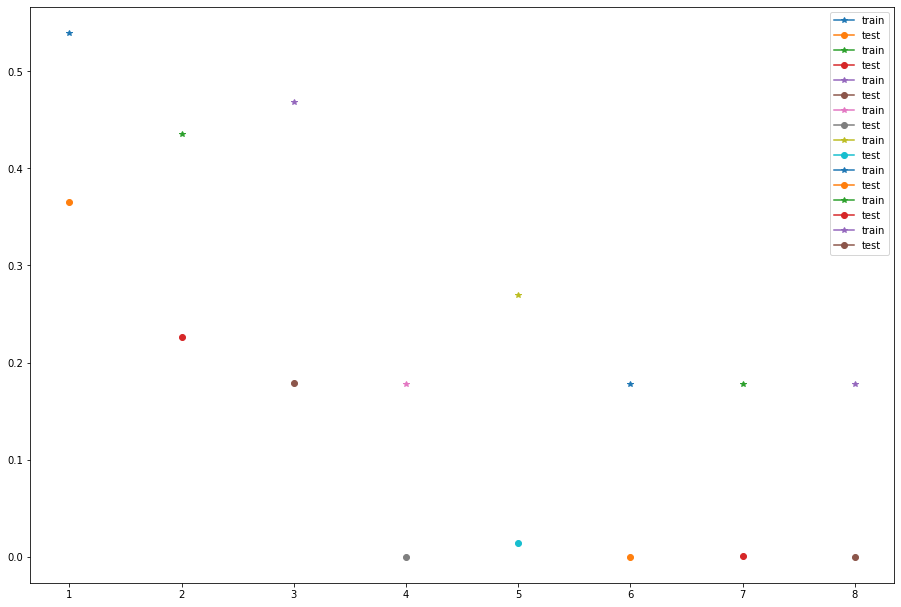

In [0]:
# grid search values
from keras.regularizers import l1
from matplotlib import pyplot
f,ax = plt.subplots(1,1)
f.subplots_adjust(0,0,2,2)
values = [0,1e-1]  #, 1e-2, 1e-3
i=-1
d=1
for parama in values:
    i=i+1
    j=0
    for paramb in values:
        for paramc in values:
            all_train, all_test = list(), list()
            model = tf.keras.models.Sequential()
            model.add(tf.keras.layers.Flatten())
            model.add(tf.keras.layers.Dense(300, activation="relu",kernel_regularizer=l1(parama)))
            model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l1(paramb)))
            #model.add(tf.keras.layers.Dropout(rate=0.5))
            model.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=l1(paramc)))
            #model.add(tf.keras.layers.Dense(60, activation="relu",kernel_regularizer=l2(param)))
            #model.add(tf.keras.layers.Dropout(rate=0.5))
            model.add(tf.keras.layers.Dense(6, activation="softmax"))
            model.compile(loss="sparse_categorical_crossentropy",
                             optimizer="sgd",
                              metrics=["accuracy"])
        
            model.fit(train_data,labels,epochs=5)
            _,train_acc = model.evaluate(train_data,labels, verbose=0)
            _,test_acc = model.evaluate(test_images, test_labels, verbose=0)
            all_train.append(train_acc)
            all_test.append(test_acc)
            ax.plot(d, all_train, label="train", marker='*')
            ax.plot(d, all_test, label="test", marker='o')
            ax.legend(loc="best")

            j=j+1
            d=d+1

In [0]:
15-functional

# 15

In [0]:
#2
input_A = tf.keras.layers.Input(shape=[150,150,3])
input_B = tf.keras.layers.Input(shape=[150,150,3])
flat1=tf.keras.layers.Flatten()(input_A)
hidden11 = tf.keras.layers.Dense(300, activation="relu")(flat1)
hidden12 = tf.keras.layers.Dense(200, activation="relu")(hidden11)
reg1=tf.keras.layers.Dropout(rate=.5)(hidden12)
flat2=tf.keras.layers.Flatten()(input_B)
hidden21 = tf.keras.layers.Dense(300, activation="relu")(flat2)
hidden22 = tf.keras.layers.Dense(200, activation="relu")(hidden21)
hidden23=tf.keras.layers.Dense(200, activation="relu")(hidden22)
reg2=tf.keras.layers.Dropout(rate=.5)(hidden23)
concat = tf.keras.layers.concatenate([reg1, hidden23])
output = tf.keras.layers.Dense(6,activation="softmax" ,name="output")(concat)
model = tf.keras.models.Model(inputs=[input_A,input_B], outputs=[output])

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [0]:
x_train=train_data[2826:]
x_valid=train_data[:2826]
x_test=test_images
y_train=labels[2826:]
y_valid=labels[:2826]
y_test=test_labels

In [0]:
x_train_A, x_train_B = x_train[:,:,:], x_train[:,:,:]
x_valid_A, x_valid_B = x_valid[: ,:,:], x_valid[:,:,:]
x_test_A, x_test_B = x_test[:, :,:], x_test[:, :,:]
trained = model.fit((x_train_A, x_train_B), y_train, epochs=32,validation_data=((x_valid_A, x_valid_B), y_valid))

Train on 25426 samples, validate on 2826 samples
Epoch 1/32
25426/25426 [==============================] - 136s 5ms/sample - loss: 2.3632 - accuracy: 0.4241 - val_loss: 1.3132 - val_accuracy: 0.4922
Epoch 2/32
25426/25426 [==============================] - 133s 5ms/sample - loss: 1.2779 - accuracy: 0.5005 - val_loss: 1.2919 - val_accuracy: 0.4858
Epoch 3/32
25426/25426 [==============================] - 134s 5ms/sample - loss: 1.2024 - accuracy: 0.5341 - val_loss: 1.3037 - val_accuracy: 0.4816
Epoch 4/32
25426/25426 [==============================] - 135s 5ms/sample - loss: 1.1658 - accuracy: 0.5488 - val_loss: 1.1471 - val_accuracy: 0.5495
Epoch 5/32
25426/25426 [==============================] - 135s 5ms/sample - loss: 1.1210 - accuracy: 0.5676 - val_loss: 1.1710 - val_accuracy: 0.5534
Epoch 6/32
25426/25426 [==============================] - 136s 5ms/sample - loss: 1.1146 - accuracy: 0.5706 - val_loss: 1.1509 - val_accuracy: 0.5605
Epoch 7/32
25426/25426 [===========================

In [0]:
print(model.metrics_names)

['loss', 'accuracy']


In [0]:
 loss, accuracy =model.evaluate([ x_test_A ,  x_test_B], y_test ,verbose=2)

3020/1 - 5s - loss: 442.1575 - accuracy: 0.3596


In [0]:
#1
input_A = tf.keras.layers.Input(shape=[75,150,3])
input_B = tf.keras.layers.Input(shape=[75,150,3])
flat1=tf.keras.layers.Flatten()(input_A)
flat2=tf.keras.layers.Flatten()(input_B)
hidden1 = tf.keras.layers.Dense(300, activation="relu")(flat2)
hidden2 = tf.keras.layers.Dense(100, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([flat1, hidden2])
output = tf.keras.layers.Dense(6,activation="softmax", name="output")(concat)
model = tf.keras.models.Model(inputs=[input_A,input_B], outputs=[output])

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
x_train=train_data[2826:]
x_valid=train_data[:2826]
x_test=test_images
y_train=labels[2826:]
y_valid=labels[:2826]
y_test=test_labels

In [0]:
x_train_A, x_train_B = x_train[:,:75], x_train[:,75:150]
x_valid_A, x_valid_B = x_valid[: ,:75], x_valid[:,75:150]
x_test_A, x_test_B = x_test[:, :75], x_test[:, 75:150]
trained = model.fit((x_train_A, x_train_B), y_train, epochs=20,validation_data=((x_valid_A, x_valid_B), y_valid))

Train on 25426 samples, validate on 2826 samples
Epoch 1/20
25426/25426 [==============================] - 33s 1ms/sample - loss: 19.2342 - accuracy: 0.2891 - val_loss: 10.2190 - val_accuracy: 0.3040
Epoch 2/20
25426/25426 [==============================] - 33s 1ms/sample - loss: 16.5949 - accuracy: 0.3274 - val_loss: 15.2558 - val_accuracy: 0.2997
Epoch 3/20
25426/25426 [==============================] - 33s 1ms/sample - loss: 15.6974 - accuracy: 0.3455 - val_loss: 12.7215 - val_accuracy: 0.4041
Epoch 4/20
25426/25426 [==============================] - 33s 1ms/sample - loss: 14.5221 - accuracy: 0.3679 - val_loss: 11.6401 - val_accuracy: 0.4059
Epoch 5/20
25426/25426 [==============================] - 33s 1ms/sample - loss: 13.7796 - accuracy: 0.3786 - val_loss: 21.2061 - val_accuracy: 0.3107
Epoch 6/20
25426/25426 [==============================] - 33s 1ms/sample - loss: 13.1639 - accuracy: 0.3872 - val_loss: 7.9101 - val_accuracy: 0.4183
Epoch 7/20
25426/25426 [======================

In [0]:
 loss, accuracy =model.evaluate([ x_test_A ,  x_test_B], y_test ,verbose=2)

3020/1 - 2s - loss: 5877.9995 - accuracy: 0.3079


In [0]:
input_A = tf.keras.layers.Input(shape=[75,75,3])
input_B = tf.keras.layers.Input(shape=[75,75,3])
flat1=tf.keras.layers.Flatten()(input_A)
flat2=tf.keras.layers.Flatten()(input_B)
hidden1 = tf.keras.layers.Dense(300, activation="relu")(flat2)
hidden2 = tf.keras.layers.Dense(100, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([flat1, hidden2])
output = tf.keras.layers.Dense(6,activation="softmax", name="output")(concat)
model = tf.keras.models.Model(inputs=[input_A,input_B], outputs=[output])

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
x_train=train_data[2826:]
x_valid=train_data[:2826]
x_test=test_images
y_train=labels[2826:]
y_valid=labels[:2826]
y_test=test_labels

In [0]:
x_train_A, x_train_B = x_train[:,:75,:75], x_train[:,75:150,75:150]
x_valid_A, x_valid_B = x_valid[:,:75,:75], x_valid[:,75:150,75:150]
x_test_A, x_test_B = x_test[:, :75,:75], x_test[:, 75:150,75:150]
trained = model.fit((x_train_A, x_train_B), y_train, epochs=20,validation_data=((x_valid_A, x_valid_B), y_valid))

Train on 25426 samples, validate on 2826 samples
Epoch 1/20
25426/25426 [==============================] - 18s 696us/sample - loss: 9.4288 - accuracy: 0.2834 - val_loss: 12.2220 - val_accuracy: 0.2887
Epoch 2/20
25426/25426 [==============================] - 17s 672us/sample - loss: 8.4032 - accuracy: 0.3240 - val_loss: 11.7007 - val_accuracy: 0.3542
Epoch 3/20
25426/25426 [==============================] - 17s 670us/sample - loss: 7.8764 - accuracy: 0.3446 - val_loss: 11.2857 - val_accuracy: 0.3217
Epoch 4/20
25426/25426 [==============================] - 17s 670us/sample - loss: 7.3368 - accuracy: 0.3579 - val_loss: 11.7506 - val_accuracy: 0.3054
Epoch 5/20
25426/25426 [==============================] - 17s 672us/sample - loss: 6.8556 - accuracy: 0.3737 - val_loss: 7.4324 - val_accuracy: 0.3567
Epoch 6/20
25426/25426 [==============================] - 17s 665us/sample - loss: 6.7438 - accuracy: 0.3824 - val_loss: 9.2416 - val_accuracy: 0.3662
Epoch 7/20
25426/25426 [=================

In [0]:
x_train_A.shape

(25426, 75, 75, 3)

In [0]:
loss, accuracy =model.evaluate([ x_test_A ,  x_test_B], y_test ,verbose=2)

3020/1 - 1s - loss: 1301.2543 - accuracy: 0.4613


In [0]:
#2new
input_A = tf.keras.layers.Input(shape=[150,150,3])
input_B = tf.keras.layers.Input(shape=[150,150,3])
flat1=tf.keras.layers.Flatten()(input_A)
hidden11 = tf.keras.layers.Dense(300, activation="relu")(flat1)
hidden12 = tf.keras.layers.Dense(200, activation="relu")(hidden11)
reg1=tf.keras.layers.Dropout(rate=.5)(hidden12)
flat2=tf.keras.layers.Flatten()(input_B)
hidden21 = tf.keras.layers.Dense(300, activation="relu")(flat2)
hidden22 = tf.keras.layers.Dense(200, activation="relu")(hidden21)
hidden23=tf.keras.layers.Dense(200, activation="relu")(hidden22)
reg2=tf.keras.layers.Dropout(rate=.5)(hidden23)
concat = tf.keras.layers.concatenate([reg1, hidden23])
output = tf.keras.layers.Dense(6,activation="softmax" ,name="output")(concat)
model = tf.keras.models.Model(inputs=[input_A,input_B], outputs=[output])

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [0]:
x_train=train_data[2826:]
x_valid=train_data[:2826]
x_test=test_images
y_train=labels[2826:]
y_valid=labels[:2826]
y_test=test_labels

In [0]:
x_train_A, x_train_B = x_train[:,:,:], x_train[:,:,:]
x_valid_A, x_valid_B = x_valid[: ,:,:], x_valid[:,:,:]
x_test_A, x_test_B = x_test[:, :,:], x_test[:, :,:]
trained = model.fit((x_train_A, x_train_B), y_train, epochs=20,validation_data=((x_valid_A, x_valid_B), y_valid))

Train on 25426 samples, validate on 2826 samples
Epoch 1/20
25426/25426 [==============================] - 140s 6ms/sample - loss: 2.2677 - accuracy: 0.4334 - val_loss: 1.3597 - val_accuracy: 0.4795
Epoch 2/20
25426/25426 [==============================] - 140s 6ms/sample - loss: 1.2838 - accuracy: 0.4984 - val_loss: 1.2486 - val_accuracy: 0.5340
Epoch 3/20
25426/25426 [==============================] - 140s 6ms/sample - loss: 1.1966 - accuracy: 0.5342 - val_loss: 1.2319 - val_accuracy: 0.5297
Epoch 4/20
25426/25426 [==============================] - 140s 6ms/sample - loss: 1.1704 - accuracy: 0.5484 - val_loss: 1.1619 - val_accuracy: 0.5502
Epoch 5/20
25426/25426 [==============================] - 140s 5ms/sample - loss: 1.1171 - accuracy: 0.5677 - val_loss: 1.1620 - val_accuracy: 0.5662
Epoch 6/20
25426/25426 [==============================] - 140s 5ms/sample - loss: 1.0959 - accuracy: 0.5765 - val_loss: 1.1495 - val_accuracy: 0.5651
Epoch 7/20
25426/25426 [===========================

In [0]:
 loss, accuracy =model.evaluate([ x_test_A ,  x_test_B], y_test ,verbose=2)

3020/1 - 6s - loss: 369.6115 - accuracy: 0.3864


In [0]:
input_A = tf.keras.layers.Input(shape=[75,75,3])
input_B = tf.keras.layers.Input(shape=[75,75,3])
flat1=tf.keras.layers.Flatten()(input_A)
flat2=tf.keras.layers.Flatten()(input_B)
hidden21 = tf.keras.layers.Dense(300, activation="relu")(flat2)
hidden22 = tf.keras.layers.Dense(100, activation="relu")(hidden21)
concat = tf.keras.layers.concatenate([flat1, hidden22])
output = tf.keras.layers.Dense(6,activation="softmax", name="main_output")(concat)
aux_output = tf.keras.layers.Dense(6,activation="softmax", name="aux_output")(hidden22)
model = tf.keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [0]:
model.compile(loss=["sparse_categorical_crossentropy", "sparse_categorical_crossentropy"], metrics=["accuracy","accuracy"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [0]:
x_train_A, x_train_B = x_train[:,:75,:75], x_train[:,75:150,75:150]
x_valid_A, x_valid_B = x_valid[:,:75,:75], x_valid[:,75:150,75:150]
x_test_A, x_test_B = x_test[:, :75,:75], x_test[:, 75:150,75:150]
trained = model.fit([x_train_A, x_train_B], [y_train, y_train], epochs=20,
                    validation_data=([x_valid_A, x_valid_B], [y_valid, y_valid]))

Train on 25426 samples, validate on 2826 samples
Epoch 1/20
25426/25426 [==============================] - 18s 720us/sample - loss: 7.8535 - main_output_loss: 8.5460 - aux_output_loss: 1.6078 - main_output_accuracy: 0.2805 - aux_output_accuracy: 0.3482 - val_loss: 8.5626 - val_main_output_loss: 9.4033 - val_aux_output_loss: 1.5453 - val_main_output_accuracy: 0.3280 - val_aux_output_accuracy: 0.3988
Epoch 2/20
25426/25426 [==============================] - 18s 690us/sample - loss: 6.9617 - main_output_loss: 7.5655 - aux_output_loss: 1.5185 - main_output_accuracy: 0.3232 - aux_output_accuracy: 0.3988 - val_loss: 6.2322 - val_main_output_loss: 6.7573 - val_aux_output_loss: 1.4946 - val_main_output_accuracy: 0.3528 - val_aux_output_accuracy: 0.4101
Epoch 3/20
25426/25426 [==============================] - 18s 691us/sample - loss: 6.5417 - main_output_loss: 7.1015 - aux_output_loss: 1.4814 - main_output_accuracy: 0.3463 - aux_output_accuracy: 0.4173 - val_loss: 6.5688 - val_main_output_loss

In [0]:
model.evaluate([ x_test_A ,  x_test_B], [y_test,y_test] ,verbose=2)

3020/1 - 1s - loss: 1496.4679 - main_output_loss: 1690.7283 - aux_output_loss: 189.4400 - main_output_accuracy: 0.2368 - aux_output_accuracy: 0.4070


[1541.187558529077, 1690.7283, 189.43997, 0.23675497, 0.40695363]

In [0]:
input_A = tf.keras.layers.Input(shape=[150,150,3])
input_B = tf.keras.layers.Input(shape=[150,150,3])
flat1=tf.keras.layers.Flatten()(input_A)
flat2=tf.keras.layers.Flatten()(input_B)
hidden21 = tf.keras.layers.Dense(300, activation="relu")(flat2)
hidden22 = tf.keras.layers.Dense(100, activation="relu")(hidden21)
concat = tf.keras.layers.concatenate([flat1, hidden22])
output = tf.keras.layers.Dense(6,activation="softmax", name="main_output")(concat)
aux_output = tf.keras.layers.Dense(6,activation="softmax", name="aux_output")(hidden22)
model = tf.keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [0]:
model.compile(loss=["sparse_categorical_crossentropy", "sparse_categorical_crossentropy"], metrics=["accuracy","accuracy"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [0]:
x_train=train_data[2826:]
x_valid=train_data[:2826]
x_test=test_images
y_train=labels[2826:]
y_valid=labels[:2826]
y_test=test_labels

In [0]:
x_train_A, x_train_B = x_train[:,:,:], x_train[:,:,:]
x_valid_A, x_valid_B = x_valid[: ,:,:], x_valid[:,:,:]
x_test_A, x_test_B = x_test[:, :,:], x_test[:, :,:]
early_stopping_cb=tf.keras.callbacks.EarlyStopping(monitor='main_output_accuracy', patience=2, verbose=2, mode='auto',  restore_best_weights=True)
trained = model.fit([x_train_A, x_train_B], [y_train, y_train], epochs=20,validation_data=([x_valid_A, x_valid_B], [y_valid, y_valid]),callbacks=[ early_stopping_cb])

Train on 25426 samples, validate on 2826 samples
Epoch 1/20
25426/25426 [==============================] - 67s 3ms/sample - loss: 22.9895 - main_output_loss: 25.3707 - aux_output_loss: 1.5129 - main_output_accuracy: 0.3130 - aux_output_accuracy: 0.4218 - val_loss: 17.6344 - val_main_output_loss: 19.3705 - val_aux_output_loss: 1.4399 - val_main_output_accuracy: 0.3422 - val_aux_output_accuracy: 0.4593
Epoch 2/20
25426/25426 [==============================] - 66s 3ms/sample - loss: 18.5089 - main_output_loss: 20.4082 - aux_output_loss: 1.4041 - main_output_accuracy: 0.3683 - aux_output_accuracy: 0.4711 - val_loss: 24.9416 - val_main_output_loss: 27.5336 - val_aux_output_loss: 1.3895 - val_main_output_accuracy: 0.2410 - val_aux_output_accuracy: 0.4604
Epoch 3/20
25426/25426 [==============================] - 66s 3ms/sample - loss: 17.5247 - main_output_loss: 19.3146 - aux_output_loss: 1.3786 - main_output_accuracy: 0.3812 - aux_output_accuracy: 0.4804 - val_loss: 15.5486 - val_main_output

In [0]:
model.evaluate([ x_test_A ,  x_test_B], [y_test,y_test] ,verbose=2)

3020/1 - 4s - loss: 7749.3679 - main_output_loss: 7242.3394 - aux_output_loss: 294.2313 - main_output_accuracy: 0.3672 - aux_output_accuracy: 0.3136


[6531.502339869619, 7242.3394, 294.2313, 0.36721855, 0.31357616]

In [0]:
tf.keras.utils.plot_model

<function tensorflow.python.keras.utils.vis_utils.plot_model>

In [0]:
tf.keras.utils.plot_model(model,to_file='model.png', show_shapes=True)

OSError: ignored

In [0]:
from keras.layers.normalization import BatchNormalization

In [0]:
tf.keras.layers.BatchNormalization

tensorflow.python.keras.layers.normalization_v2.BatchNormalization

In [0]:
tf.keras.layers.BatchNormalization
input_A = tf.keras.layers.Input(shape=[75,75,3])
input_B = tf.keras.layers.Input(shape=[75,75,3])
flat1=tf.keras.layers.Flatten()(input_A)
flat2=tf.keras.layers.Flatten()(input_B)
hidden1 = tf.keras.layers.Dense(300, activation="relu")(flat2)
b1= tf.keras.layers.BatchNormalization()(hidden1)
hidden2 = tf.keras.layers.Dense(100, activation="relu")(b1)
concat = tf.keras.layers.concatenate([flat1, hidden2])
output = tf.keras.layers.Dense(6,activation="softmax", name="output")(concat)
model = tf.keras.models.Model(inputs=[input_A,input_B], outputs=[output])

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
x_train=train_data[2826:]
x_valid=train_data[:2826]
x_test=test_images
y_train=labels[2826:]
y_valid=labels[:2826]
y_test=test_labels

In [0]:
x_train_A, x_train_B = x_train[:,:75,:75], x_train[:,75:150,75:150]
x_valid_A, x_valid_B = x_valid[:,:75,:75], x_valid[:,75:150,75:150]
x_test_A, x_test_B = x_test[:, :75,:75], x_test[:, 75:150,75:150]
early_stopping_cb=tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2, verbose=2, mode='auto',  restore_best_weights=True)
trained = model.fit((x_train_A, x_train_B), y_train, epochs=20,validation_data=((x_valid_A, x_valid_B), y_valid),callbacks=[ early_stopping_cb])

Train on 25426 samples, validate on 2826 samples
Epoch 1/20
25426/25426 [==============================] - 14s 539us/sample - loss: 8.7210 - accuracy: 0.3139 - val_loss: 5.5112 - val_accuracy: 0.3723
Epoch 2/20
25426/25426 [==============================] - 13s 518us/sample - loss: 6.8696 - accuracy: 0.3701 - val_loss: 7.9380 - val_accuracy: 0.3461
Epoch 3/20
25426/25426 [==============================] - 13s 524us/sample - loss: 6.7340 - accuracy: 0.3815 - val_loss: 6.3938 - val_accuracy: 0.3684
Epoch 4/20
25426/25426 [==============================] - 13s 517us/sample - loss: 6.3420 - accuracy: 0.3964 - val_loss: 5.8465 - val_accuracy: 0.3740
Epoch 5/20
25426/25426 [==============================] - 13s 511us/sample - loss: 6.1783 - accuracy: 0.4017 - val_loss: 8.1612 - val_accuracy: 0.4055
Epoch 6/20
25426/25426 [==============================] - 13s 512us/sample - loss: 5.8201 - accuracy: 0.4132 - val_loss: 9.1090 - val_accuracy: 0.4229
Epoch 7/20
25426/25426 [=====================

In [0]:
loss, accuracy =model.evaluate([ x_test_A ,  x_test_B], y_test ,verbose=2)

3020/1 - 1s - loss: 1623.9057 - accuracy: 0.3589


In [0]:
16

# 16

In [0]:
from keras.activations import elu
def selu(x):
    alpha = 1.6732632423543772848170429916717
    scale = 1.0507009873554804934193349852946
    return scale * elu(x, alpha)
input_A = tf.keras.layers.Input(shape=[75,75,3])
input_B = tf.keras.layers.Input(shape=[75,75,3])
flat1=tf.keras.layers.Flatten()(input_A)
flat2=tf.keras.layers.Flatten()(input_B)
hidden1 = tf.keras.layers.Dense(300, activation="selu")(flat2)
hidden2 = tf.keras.layers.Dense(100, activation="selu")(hidden1)
concat = tf.keras.layers.concatenate([flat1, hidden2])
output = tf.keras.layers.Dense(6,activation="softmax", name="output")(concat)
model = tf.keras.models.Model(inputs=[input_A,input_B], outputs=[output])

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
x_train=train_data[2826:]
x_valid=train_data[:2826]
x_test=test_images
y_train=labels[2826:]
y_valid=labels[:2826]
y_test=test_labels

In [0]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2, verbose=2, mode='auto',  restore_best_weights=True)
x_train_A, x_train_B = x_train[:,:75,:75], x_train[:,75:150,75:150]
x_valid_A, x_valid_B = x_valid[:,:75,:75], x_valid[:,75:150,75:150]
x_test_A, x_test_B = x_test[:, :75,:75], x_test[:, 75:150,75:150]
trained = model.fit((x_train_A, x_train_B), y_train, epochs=20,validation_data=((x_valid_A, x_valid_B), y_valid),callbacks=[ early_stopping_cb])

Train on 25426 samples, validate on 2826 samples
Epoch 1/20
25426/25426 [==============================] - 14s 543us/sample - loss: 7.4357 - accuracy: 0.3637 - val_loss: 12.8644 - val_accuracy: 0.2297
Epoch 2/20
25426/25426 [==============================] - 14s 535us/sample - loss: 6.9315 - accuracy: 0.3797 - val_loss: 6.5033 - val_accuracy: 0.3567
Epoch 3/20
25426/25426 [==============================] - 14s 534us/sample - loss: 6.4805 - accuracy: 0.3996 - val_loss: 9.7955 - val_accuracy: 0.3457
Epoch 4/20
25426/25426 [==============================] - 13s 524us/sample - loss: 6.2041 - accuracy: 0.4047 - val_loss: 7.4021 - val_accuracy: 0.4253
Epoch 5/20
25426/25426 [==============================] - 13s 521us/sample - loss: 6.0450 - accuracy: 0.4137 - val_loss: 3.2574 - val_accuracy: 0.4204
Epoch 6/20
25426/25426 [==============================] - 13s 522us/sample - loss: 5.5564 - accuracy: 0.4299 - val_loss: 5.7304 - val_accuracy: 0.3524
Epoch 7/20
25426/25426 [====================

In [0]:
loss, accuracy =model.evaluate([ x_test_A ,  x_test_B], y_test ,verbose=2)

3020/1 - 1s - loss: 1450.1050 - accuracy: 0.1321


In [0]:
tf.nn.selu
input_A = tf.keras.layers.Input(shape=[75,75,3])
input_B = tf.keras.layers.Input(shape=[75,75,3])
flat1=tf.keras.layers.Flatten()(input_A)
flat2=tf.keras.layers.Flatten()(input_B)
hidden1 = tf.keras.layers.Dense(300, activation=tf.nn.selu)(flat2)
hidden2 = tf.keras.layers.Dense(100, activation=tf.nn.selu)(hidden1)
concat = tf.keras.layers.concatenate([flat1, hidden2])
output = tf.keras.layers.Dense(6,activation="softmax", name="output")(concat)
model = tf.keras.models.Model(inputs=[input_A,input_B], outputs=[output])

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
x_train=train_data[2826:]
x_valid=train_data[:2826]
x_test=test_images
y_train=labels[2826:]
y_valid=labels[:2826]
y_test=test_labels

In [0]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2, verbose=2, mode='auto',  restore_best_weights=True)
x_train_A, x_train_B = x_train[:,:75,:75], x_train[:,75:150,75:150]
x_valid_A, x_valid_B = x_valid[:,:75,:75], x_valid[:,75:150,75:150]
x_test_A, x_test_B = x_test[:, :75,:75], x_test[:, 75:150,75:150]
trained = model.fit((x_train_A, x_train_B), y_train, epochs=20,validation_data=((x_valid_A, x_valid_B), y_valid),callbacks=[ early_stopping_cb])

Train on 25426 samples, validate on 2826 samples
Epoch 1/20
25426/25426 [==============================] - 13s 524us/sample - loss: 9.3277 - accuracy: 0.2932 - val_loss: 8.0076 - val_accuracy: 0.3496
Epoch 2/20
25426/25426 [==============================] - 13s 523us/sample - loss: 7.9266 - accuracy: 0.3471 - val_loss: 3.6271 - val_accuracy: 0.3627
Epoch 3/20
25426/25426 [==============================] - 13s 510us/sample - loss: 7.2961 - accuracy: 0.3672 - val_loss: 4.4701 - val_accuracy: 0.4140
Epoch 4/20
25426/25426 [==============================] - 13s 519us/sample - loss: 6.8984 - accuracy: 0.3824 - val_loss: 4.1302 - val_accuracy: 0.3928
Epoch 5/20
25426/25426 [==============================] - 13s 510us/sample - loss: 6.2866 - accuracy: 0.4013 - val_loss: 7.3896 - val_accuracy: 0.3263
Epoch 6/20
25426/25426 [==============================] - 13s 509us/sample - loss: 6.2069 - accuracy: 0.4126 - val_loss: 5.6871 - val_accuracy: 0.3613
Epoch 7/20
25426/25426 [=====================

In [0]:
loss, accuracy =model.evaluate([ x_test_A ,  x_test_B], y_test ,verbose=2)

3020/1 - 1s - loss: 3269.7114 - accuracy: 0.1970


In [0]:
from keras.activations import elu
def selu(x):
    with ops.name_scope('elu') as scope:
        alpha = 1.6732632423543772848170429916717
        scale = 1.0507009873554804934193349852946
        return scale*tf.where(x>=0.0, x, alpha*tf.nn.elu(x))

input_A = tf.keras.layers.Input(shape=[75,75,3])
input_B = tf.keras.layers.Input(shape=[75,75,3])
flat1=tf.keras.layers.Flatten()(input_A)
flat2=tf.keras.layers.Flatten()(input_B)
hidden1 = tf.keras.layers.Dense(300, activation="selu")(flat2)
hidden2 = tf.keras.layers.Dense(100, activation="selu")(hidden1)
concat = tf.keras.layers.concatenate([flat1, hidden2])
output = tf.keras.layers.Dense(6,activation="softmax", name="output")(concat)
model = tf.keras.models.Model(inputs=[input_A,input_B], outputs=[output])

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
x_train=train_data[2826:]
x_valid=train_data[:2826]
x_test=test_images
y_train=labels[2826:]
y_valid=labels[:2826]
y_test=test_labels

In [0]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, verbose=2, mode='auto',  restore_best_weights=True)
x_train_A, x_train_B = x_train[:,:75,:75], x_train[:,75:150,75:150]
x_valid_A, x_valid_B = x_valid[:,:75,:75], x_valid[:,75:150,75:150]
x_test_A, x_test_B = x_test[:, :75,:75], x_test[:, 75:150,75:150]
trained = model.fit((x_train_A, x_train_B), y_train, epochs=20,validation_data=((x_valid_A, x_valid_B), y_valid),callbacks=[ early_stopping_cb])

Train on 25426 samples, validate on 2826 samples
Epoch 1/20
25426/25426 [==============================] - 14s 536us/sample - loss: 9.2719 - accuracy: 0.2934 - val_loss: 11.3434 - val_accuracy: 0.3040
Epoch 2/20
25426/25426 [==============================] - 13s 528us/sample - loss: 7.9200 - accuracy: 0.3454 - val_loss: 7.3365 - val_accuracy: 0.3839
Epoch 3/20
25426/25426 [==============================] - 13s 522us/sample - loss: 7.0448 - accuracy: 0.3727 - val_loss: 12.2714 - val_accuracy: 0.3139
Epoch 4/20
25426/25426 [==============================] - 14s 533us/sample - loss: 6.9130 - accuracy: 0.3840 - val_loss: 6.0088 - val_accuracy: 0.3800
Epoch 00004: early stopping


In [0]:
loss, accuracy =model.evaluate([ x_test_A ,  x_test_B], y_test ,verbose=2)

3020/1 - 1s - loss: 4238.1051 - accuracy: 0.2540


In [0]:
#early_stopping_cb=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, verbose=2, mode='auto',  restore_best_weights=True)
x_train_A, x_train_B = x_train[:,:75,:75], x_train[:,75:150,75:150]
x_valid_A, x_valid_B = x_valid[:,:75,:75], x_valid[:,75:150,75:150]
x_test_A, x_test_B = x_test[:, :75,:75], x_test[:, 75:150,75:150]
trained = model.fit((x_train_A, x_train_B), y_train, epochs=20,validation_data=((x_valid_A, x_valid_B), y_valid))

Train on 25426 samples, validate on 2826 samples
Epoch 1/20
25426/25426 [==============================] - 15s 579us/sample - loss: 9.3374 - accuracy: 0.2912 - val_loss: 9.9278 - val_accuracy: 0.3563
Epoch 2/20
25426/25426 [==============================] - 14s 543us/sample - loss: 7.8077 - accuracy: 0.3509 - val_loss: 9.8402 - val_accuracy: 0.3577
Epoch 3/20
25426/25426 [==============================] - 14s 541us/sample - loss: 7.1693 - accuracy: 0.3685 - val_loss: 7.4766 - val_accuracy: 0.3652
Epoch 4/20
25426/25426 [==============================] - 14s 542us/sample - loss: 6.8676 - accuracy: 0.3839 - val_loss: 3.4368 - val_accuracy: 0.4352
Epoch 5/20
25426/25426 [==============================] - 14s 547us/sample - loss: 6.5878 - accuracy: 0.3921 - val_loss: 4.2548 - val_accuracy: 0.4059
Epoch 6/20
25426/25426 [==============================] - 14s 551us/sample - loss: 6.1935 - accuracy: 0.4097 - val_loss: 5.6149 - val_accuracy: 0.3652
Epoch 7/20
25426/25426 [=====================

In [0]:
loss, accuracy =model.evaluate([ x_test_A ,  x_test_B], y_test ,verbose=2)

3020/1 - 1s - loss: 1898.4106 - accuracy: 0.2235


# 17


In [0]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
trained = model.fit(Images,Labels,epochs=35,validation_split=0.30)

Train on 2458 samples, validate on 1054 samples
Epoch 1/35
2458/2458 [==============================] - 63s 26ms/sample - loss: 1.3617 - acc: 0.5936 - val_loss: 0.7069 - val_acc: 0.8046
Epoch 2/35
2458/2458 [==============================] - 50s 21ms/sample - loss: 0.9411 - acc: 0.7059 - val_loss: 0.6403 - val_acc: 0.8169
Epoch 3/35
2458/2458 [==============================] - 51s 21ms/sample - loss: 0.8442 - acc: 0.7368 - val_loss: 0.6001 - val_acc: 0.8216
Epoch 4/35
2458/2458 [==============================] - 50s 21ms/sample - loss: 0.7831 - acc: 0.7592 - val_loss: 0.5611 - val_acc: 0.8283
Epoch 5/35
2458/2458 [==============================] - 50s 20ms/sample - loss: 0.7343 - acc: 0.7677 - val_loss: 0.5662 - val_acc: 0.8178
Epoch 6/35
2458/2458 [==============================] - 50s 20ms/sample - loss: 0.7150 - acc: 0.7815 - val_loss: 0.5590 - val_acc: 0.8159
Epoch 7/35
2458/2458 [==============================] - 50s 21ms/sample - loss: 0.6716 - acc: 0.7990 - val_loss: 0.4958 - va

In [0]:
test_images,test_labels = get_images('intel-image-classification-Sample/seg_test/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

280/280 [==============================] - 3s 12ms/sample - loss: 1.3160 - acc: 0.6571


[1.3160456827708653, 0.6571429]

# 18

In [0]:
input_A = tf.keras.layers.Input(shape=[75,75,3])
input_B = tf.keras.layers.Input(shape=[75,75,3])
flat1=tf.keras.layers.Flatten()(input_A)
flat2=tf.keras.layers.Flatten()(input_B)
hidden1 = tf.keras.layers.Dense(300, activation="relu")(flat2)
hidden2 = tf.keras.layers.Dense(100, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([flat1, hidden2])
output = tf.keras.layers.Dense(6,activation="softmax", name="output")(concat)
model = tf.keras.models.Model(inputs=[input_A,input_B], outputs=[output])

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=Optimizer.Adam(lr=0.0001),
              metrics=["accuracy"])

In [0]:
x_train=train_data[2826:]
x_valid=train_data[:2826]
x_test=test_images
y_train=labels[2826:]
y_valid=labels[:2826]
y_test=test_labels

In [0]:
x_train_A, x_train_B = x_train[:,:75,:75], x_train[:,75:150,75:150]
x_valid_A, x_valid_B = x_valid[:,:75,:75], x_valid[:,75:150,75:150]
x_test_A, x_test_B = x_test[:, :75,:75], x_test[:, 75:150,75:150]
trained = model.fit((x_train_A, x_train_B), y_train, epochs=20,validation_data=((x_valid_A, x_valid_B), y_valid))

Train on 11300 samples, validate on 2826 samples
Epoch 1/20
11300/11300 [==============================] - 9s 769us/sample - loss: 1.4864 - accuracy: 0.4204 - val_loss: 1.3958 - val_accuracy: 0.4728
Epoch 2/20
11300/11300 [==============================] - 8s 738us/sample - loss: 1.3402 - accuracy: 0.4866 - val_loss: 1.3815 - val_accuracy: 0.4763
Epoch 3/20
11300/11300 [==============================] - 8s 745us/sample - loss: 1.2819 - accuracy: 0.5126 - val_loss: 1.2953 - val_accuracy: 0.5195
Epoch 4/20
11300/11300 [==============================] - 8s 736us/sample - loss: 1.2620 - accuracy: 0.5206 - val_loss: 1.3278 - val_accuracy: 0.5078
Epoch 5/20
11300/11300 [==============================] - 8s 738us/sample - loss: 1.2084 - accuracy: 0.5489 - val_loss: 1.5111 - val_accuracy: 0.4554
Epoch 6/20
11300/11300 [==============================] - 8s 727us/sample - loss: 1.1848 - accuracy: 0.5590 - val_loss: 1.3738 - val_accuracy: 0.4781
Epoch 7/20
11300/11300 [===========================

In [0]:
loss, accuracy =model.evaluate([ x_test_A ,  x_test_B], y_test ,verbose=2)

3020/1 - 1s - loss: 510.6668 - accuracy: 0.3623


In [0]:
بالایی با augment

In [0]:
input_A = tf.keras.layers.Input(shape=[75,75,3])
input_B = tf.keras.layers.Input(shape=[75,75,3])
flat1=tf.keras.layers.Flatten()(input_A)
flat2=tf.keras.layers.Flatten()(input_B)
hidden1 = tf.keras.layers.Dense(300, activation="relu")(flat2)
hidden2 = tf.keras.layers.Dense(100, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([flat1, hidden2])
output = tf.keras.layers.Dense(6,activation="softmax", name="output")(concat)
model = tf.keras.models.Model(inputs=[input_A,input_B], outputs=[output])

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=Optimizer.Adam(lr=0.0001),
              metrics=["accuracy"])

In [0]:
x_train=train_data[2826:]
x_valid=train_data[:2826]
x_test=test_images
y_train=labels[2826:]
y_valid=labels[:2826]
y_test=test_labels

In [0]:
x_train_A, x_train_B = x_train[:,:75,:75], x_train[:,75:150,75:150]
x_valid_A, x_valid_B = x_valid[:,:75,:75], x_valid[:,75:150,75:150]
x_test_A, x_test_B = x_test[:, :75,:75], x_test[:, 75:150,75:150]
trained = model.fit((x_train_A, x_train_B), y_train, epochs=20,validation_data=((x_valid_A, x_valid_B), y_valid))

Train on 25426 samples, validate on 2826 samples
Epoch 1/20
25426/25426 [==============================] - 18s 712us/sample - loss: 1.4813 - accuracy: 0.4098 - val_loss: 1.3916 - val_accuracy: 0.4685
Epoch 2/20
25426/25426 [==============================] - 18s 693us/sample - loss: 1.3614 - accuracy: 0.4663 - val_loss: 1.4096 - val_accuracy: 0.4784
Epoch 3/20
25426/25426 [==============================] - 18s 694us/sample - loss: 1.3093 - accuracy: 0.4902 - val_loss: 1.3007 - val_accuracy: 0.5127
Epoch 4/20
25426/25426 [==============================] - 18s 691us/sample - loss: 1.2704 - accuracy: 0.5082 - val_loss: 1.3169 - val_accuracy: 0.4993
Epoch 5/20
25426/25426 [==============================] - 17s 688us/sample - loss: 1.2465 - accuracy: 0.5179 - val_loss: 1.3232 - val_accuracy: 0.4912
Epoch 6/20
25426/25426 [==============================] - 17s 686us/sample - loss: 1.2238 - accuracy: 0.5269 - val_loss: 1.3288 - val_accuracy: 0.5004
Epoch 7/20
25426/25426 [=====================

In [0]:
loss, accuracy =model.evaluate([ x_test_A ,  x_test_B], y_test ,verbose=2)

3020/1 - 1s - loss: 544.0978 - accuracy: 0.2404


In [0]:
input_A = tf.keras.layers.Input(shape=[75,75,3])
input_B = tf.keras.layers.Input(shape=[75,75,3])
flat1=tf.keras.layers.Flatten()(input_A)
flat2=tf.keras.layers.Flatten()(input_B)
hidden1 = tf.keras.layers.Dense(300, activation="relu")(flat2)
hidden2 = tf.keras.layers.Dense(100, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([flat1, hidden2])
output = tf.keras.layers.Dense(6,activation="softmax", name="output")(concat)
model = tf.keras.models.Model(inputs=[input_A,input_B], outputs=[output])

In [0]:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=Optimizer.RMSprop(learning_rate=0.001, rho=0.9),
              metrics=["accuracy"])

In [0]:
x_train=train_data[2826:]
x_valid=train_data[:2826]
x_test=test_images
y_train=labels[2826:]
y_valid=labels[:2826]
y_test=test_labels

In [0]:
x_train_A, x_train_B = x_train[:,:75,:75], x_train[:,75:150,75:150]
x_valid_A, x_valid_B = x_valid[:,:75,:75], x_valid[:,75:150,75:150]
x_test_A, x_test_B = x_test[:, :75,:75], x_test[:, 75:150,75:150]
trained = model.fit((x_train_A, x_train_B), y_train, epochs=20,validation_data=((x_valid_A, x_valid_B), y_valid))

Train on 11300 samples, validate on 2826 samples
Epoch 1/20
11300/11300 [==============================] - 13s 1ms/sample - loss: 7.3108 - accuracy: 0.2813 - val_loss: 7.5800 - val_accuracy: 0.2226
Epoch 2/20
11300/11300 [==============================] - 13s 1ms/sample - loss: 6.3656 - accuracy: 0.3233 - val_loss: 6.1729 - val_accuracy: 0.3457
Epoch 3/20
11300/11300 [==============================] - 13s 1ms/sample - loss: 6.0715 - accuracy: 0.3474 - val_loss: 7.0335 - val_accuracy: 0.3224
Epoch 4/20
11300/11300 [==============================] - 13s 1ms/sample - loss: 5.8827 - accuracy: 0.3600 - val_loss: 21.6650 - val_accuracy: 0.2360
Epoch 5/20
11300/11300 [==============================] - 13s 1ms/sample - loss: 5.8226 - accuracy: 0.3769 - val_loss: 7.4848 - val_accuracy: 0.2367
Epoch 6/20
11300/11300 [==============================] - 12s 1ms/sample - loss: 5.7190 - accuracy: 0.3813 - val_loss: 15.4873 - val_accuracy: 0.2665
Epoch 7/20
11300/11300 [==============================]

In [0]:
loss, accuracy =model.evaluate([ x_test_A ,  x_test_B], y_test ,verbose=2)

3020/1 - 1s - loss: 2733.2860 - accuracy: 0.2798


In [0]:
بالایی با augment

In [0]:
input_A = tf.keras.layers.Input(shape=[75,75,3])
input_B = tf.keras.layers.Input(shape=[75,75,3])
flat1=tf.keras.layers.Flatten()(input_A)
flat2=tf.keras.layers.Flatten()(input_B)
hidden1 = tf.keras.layers.Dense(300, activation="relu")(flat2)
hidden2 = tf.keras.layers.Dense(100, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([flat1, hidden2])
output = tf.keras.layers.Dense(6,activation="softmax", name="output")(concat)
model = tf.keras.models.Model(inputs=[input_A,input_B], outputs=[output])

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=Optimizer.Adam(lr=0.0001),
              metrics=["accuracy"])

In [0]:
x_train=train_data[2826:]
x_valid=train_data[:2826]
x_test=test_images
y_train=labels[2826:]
y_valid=labels[:2826]
y_test=test_labels

In [0]:
x_train_A, x_train_B = x_train[:,:75,:75], x_train[:,75:150,75:150]
x_valid_A, x_valid_B = x_valid[:,:75,:75], x_valid[:,75:150,75:150]
x_test_A, x_test_B = x_test[:, :75,:75], x_test[:, 75:150,75:150]
trained = model.fit((x_train_A, x_train_B), y_train, epochs=20,validation_data=((x_valid_A, x_valid_B), y_valid))

Train on 25426 samples, validate on 2826 samples
Epoch 1/20
25426/25426 [==============================] - 18s 700us/sample - loss: 1.4800 - accuracy: 0.4054 - val_loss: 1.4375 - val_accuracy: 0.4161
Epoch 2/20
25426/25426 [==============================] - 17s 688us/sample - loss: 1.3496 - accuracy: 0.4720 - val_loss: 1.3153 - val_accuracy: 0.4986
Epoch 3/20
25426/25426 [==============================] - 18s 692us/sample - loss: 1.3095 - accuracy: 0.4899 - val_loss: 1.3935 - val_accuracy: 0.4590
Epoch 4/20
25426/25426 [==============================] - 18s 696us/sample - loss: 1.2715 - accuracy: 0.5050 - val_loss: 1.3275 - val_accuracy: 0.4972
Epoch 5/20
25426/25426 [==============================] - 18s 696us/sample - loss: 1.2440 - accuracy: 0.5190 - val_loss: 1.3204 - val_accuracy: 0.4890
Epoch 6/20
25426/25426 [==============================] - 18s 692us/sample - loss: 1.2178 - accuracy: 0.5302 - val_loss: 1.3918 - val_accuracy: 0.4487
Epoch 7/20
25426/25426 [=====================

In [0]:
loss, accuracy =model.evaluate([ x_test_A ,  x_test_B], y_test ,verbose=2)

3020/1 - 1s - loss: 322.3311 - accuracy: 0.3825


In [0]:
input_A = tf.keras.layers.Input(shape=[75,75,3])
input_B = tf.keras.layers.Input(shape=[75,75,3])
flat1=tf.keras.layers.Flatten()(input_A)
flat2=tf.keras.layers.Flatten()(input_B)
hidden1 = tf.keras.layers.Dense(300, activation="relu")(flat2)
hidden2 = tf.keras.layers.Dense(100, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([flat1, hidden2])
output = tf.keras.layers.Dense(6,activation="softmax", name="output")(concat)
model = tf.keras.models.Model(inputs=[input_A,input_B], outputs=[output])

In [0]:
#Nesterov Adam optimizer.  Much like Adam is essentially RMSprop with momentum, Nadam is RMSprop with Nesterov momentum.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=Optimizer.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])

In [0]:
x_train=train_data[2826:]
x_valid=train_data[:2826]
x_test=test_images
y_train=labels[2826:]
y_valid=labels[:2826]
y_test=test_labels

In [0]:
x_train_A, x_train_B = x_train[:,:75,:75], x_train[:,75:150,75:150]
x_valid_A, x_valid_B = x_valid[:,:75,:75], x_valid[:,75:150,75:150]
x_test_A, x_test_B = x_test[:, :75,:75], x_test[:, 75:150,75:150]
trained = model.fit((x_train_A, x_train_B), y_train, epochs=20,validation_data=((x_valid_A, x_valid_B), y_valid))

Train on 25426 samples, validate on 2826 samples
Epoch 1/20
25426/25426 [==============================] - 39s 2ms/sample - loss: 7.4368 - accuracy: 0.2936 - val_loss: 4.8489 - val_accuracy: 0.3231
Epoch 2/20
25426/25426 [==============================] - 38s 1ms/sample - loss: 6.2760 - accuracy: 0.3276 - val_loss: 3.1293 - val_accuracy: 0.3531
Epoch 3/20
25426/25426 [==============================] - 38s 1ms/sample - loss: 5.5565 - accuracy: 0.3557 - val_loss: 3.4863 - val_accuracy: 0.4073
Epoch 4/20
25426/25426 [==============================] - 38s 1ms/sample - loss: 4.8716 - accuracy: 0.3778 - val_loss: 13.3436 - val_accuracy: 0.2141
Epoch 5/20
25426/25426 [==============================] - 38s 1ms/sample - loss: 4.4608 - accuracy: 0.3926 - val_loss: 8.2271 - val_accuracy: 0.2534
Epoch 6/20
25426/25426 [==============================] - 38s 1ms/sample - loss: 4.0499 - accuracy: 0.4099 - val_loss: 2.0901 - val_accuracy: 0.4536
Epoch 7/20
25426/25426 [==============================] 

In [0]:
loss, accuracy =model.evaluate([ x_test_A ,  x_test_B], y_test ,verbose=2)

3020/1 - 1s - loss: 711.1949 - accuracy: 0.3659


# 19

In [0]:
from keras.regularizers import l2
input_A = tf.keras.layers.Input(shape=[75,75,3])
input_B = tf.keras.layers.Input(shape=[75,75,3])
flat1=tf.keras.layers.Flatten()(input_A)
flat2=tf.keras.layers.Flatten()(input_B)
hidden1 = tf.keras.layers.Dense(300, activation="relu")(flat2)
d1=tf.keras.layers.Dropout(rate=0.5)(hidden1)
hidden2 = tf.keras.layers.Dense(200, activation="relu")(d1)
hidden3 = tf.keras.layers.Dense(200, activation="relu",kernel_regularizer=l2(.01))(hidden2)
hidden4 = tf.keras.layers.Dense(200, activation="relu")(hidden3)
concat = tf.keras.layers.concatenate([flat1, hidden4])
output = tf.keras.layers.Dense(6,activation="softmax", name="output")(concat)
model = tf.keras.models.Model(inputs=[input_A,input_B], outputs=[output])

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
x_train=train_data[2826:]
x_valid=train_data[:2826]
x_test=test_images
y_train=labels[2826:]
y_valid=labels[:2826]
y_test=test_labels

In [0]:
x_train_A, x_train_B = x_train[:,:75,:75], x_train[:,75:150,75:150]
x_valid_A, x_valid_B = x_valid[:,:75,:75], x_valid[:,75:150,75:150]
x_test_A, x_test_B = x_test[:, :75,:75], x_test[:, 75:150,75:150]
trained = model.fit((x_train_A, x_train_B), y_train, epochs=20,validation_data=((x_valid_A, x_valid_B), y_valid))

Train on 25426 samples, validate on 2826 samples
Epoch 1/20
25426/25426 [==============================] - 16s 616us/sample - loss: 11.1585 - accuracy: 0.2833 - val_loss: 12.0604 - val_accuracy: 0.2987
Epoch 2/20
25426/25426 [==============================] - 15s 594us/sample - loss: 10.0395 - accuracy: 0.3094 - val_loss: 10.8125 - val_accuracy: 0.3379
Epoch 3/20
25426/25426 [==============================] - 15s 586us/sample - loss: 9.3874 - accuracy: 0.3216 - val_loss: 8.1878 - val_accuracy: 0.3496
Epoch 4/20
25426/25426 [==============================] - 15s 594us/sample - loss: 8.6915 - accuracy: 0.3393 - val_loss: 12.7176 - val_accuracy: 0.3379
Epoch 5/20
25426/25426 [==============================] - 15s 590us/sample - loss: 8.2090 - accuracy: 0.3459 - val_loss: 8.7042 - val_accuracy: 0.2626
Epoch 6/20
25426/25426 [==============================] - 15s 589us/sample - loss: 8.1003 - accuracy: 0.3476 - val_loss: 8.3671 - val_accuracy: 0.3036
Epoch 7/20
25426/25426 [================

In [0]:
loss, accuracy =model.evaluate([ x_test_A ,  x_test_B], y_test ,verbose=2)

3020/1 - 1s - loss: 3946.6797 - accuracy: 0.0517


In [0]:
from keras.regularizers import l2
input_A = tf.keras.layers.Input(shape=[75,75,3])
input_B = tf.keras.layers.Input(shape=[75,75,3])
flat1=tf.keras.layers.Flatten()(input_A)
flat2=tf.keras.layers.Flatten()(input_B)
hidden1 = tf.keras.layers.Dense(300, activation="relu")(flat2)
d1=tf.keras.layers.Dropout(rate=0.5)(hidden1)
hidden2 = tf.keras.layers.Dense(200, activation="relu")(d1)
hidden3 = tf.keras.layers.Dense(200, activation="relu",kernel_regularizer=l2(.01))(hidden2)
hidden4 = tf.keras.layers.Dense(200, activation="relu")(hidden3)
concat = tf.keras.layers.concatenate([flat1, hidden4])
output = tf.keras.layers.Dense(6,activation="softmax", name="output")(concat)
model = tf.keras.models.Model(inputs=[input_A,input_B], outputs=[output])

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
x_train=train_data[2826:]
x_valid=train_data[:2826]
x_test=test_images
y_train=labels[2826:]
y_valid=labels[:2826]
y_test=test_labels

In [0]:
x_train_A, x_train_B = x_train[:,:75,:75], x_train[:,75:150,75:150]
x_valid_A, x_valid_B = x_valid[:,:75,:75], x_valid[:,75:150,75:150]
x_test_A, x_test_B = x_test[:, :75,:75], x_test[:, 75:150,75:150]
trained = model.fit((x_train_A, x_train_B), y_train, epochs=20,validation_data=((x_valid_A, x_valid_B), y_valid))

Train on 11300 samples, validate on 2826 samples
Epoch 1/20
11300/11300 [==============================] - 7s 653us/sample - loss: 12.9269 - accuracy: 0.2764 - val_loss: 14.7967 - val_accuracy: 0.2311
Epoch 2/20
11300/11300 [==============================] - 7s 613us/sample - loss: 11.4692 - accuracy: 0.3201 - val_loss: 17.7531 - val_accuracy: 0.2335
Epoch 3/20
11300/11300 [==============================] - 7s 608us/sample - loss: 11.0362 - accuracy: 0.3416 - val_loss: 8.8737 - val_accuracy: 0.3330
Epoch 4/20
11300/11300 [==============================] - 7s 609us/sample - loss: 10.0313 - accuracy: 0.3535 - val_loss: 47.9903 - val_accuracy: 0.2063
Epoch 5/20
11300/11300 [==============================] - 7s 616us/sample - loss: 9.9224 - accuracy: 0.3588 - val_loss: 20.3844 - val_accuracy: 0.2307
Epoch 6/20
11300/11300 [==============================] - 7s 619us/sample - loss: 9.8131 - accuracy: 0.3643 - val_loss: 8.9681 - val_accuracy: 0.3372
Epoch 7/20
11300/11300 [===================

In [0]:
loss, accuracy =model.evaluate([ x_test_A ,  x_test_B], y_test ,verbose=2)

3020/1 - 1s - loss: 1478.1255 - accuracy: 0.2755


In [0]:
تغیررات شبکه

In [0]:
from keras.regularizers import l2
input_A = tf.keras.layers.Input(shape=[75,75,3])
input_B = tf.keras.layers.Input(shape=[75,75,3])
flat1=tf.keras.layers.Flatten()(input_A)
flat2=tf.keras.layers.Flatten()(input_B)
hidden0 = tf.keras.layers.Dense(300, activation="relu")(flat1)
hidden1 = tf.keras.layers.Dense(300, activation="relu")(flat2)
d1=tf.keras.layers.Dropout(rate=0.5)(hidden1)
d2=tf.keras.layers.Dropout(rate=0.5)(hidden0)
hidden5=tf.keras.layers.Dense(300, activation="relu")(d2)
hidden2 = tf.keras.layers.Dense(200, activation="relu")(d1)
hidden3 = tf.keras.layers.Dense(200, activation="relu",kernel_regularizer=l2(.01))(hidden2)
hidden4 = tf.keras.layers.Dense(200, activation="relu")(hidden3)
concat = tf.keras.layers.concatenate([hidden5, hidden4])
output = tf.keras.layers.Dense(6,activation="softmax", name="output")(concat)
model = tf.keras.models.Model(inputs=[input_A,input_B], outputs=[output])

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
x_train=train_data[2826:]
x_valid=train_data[:2826]
x_test=test_images
y_train=labels[2826:]
y_valid=labels[:2826]
y_test=test_labels

In [0]:
x_train_A, x_train_B = x_train[:,:75,:75], x_train[:,75:150,75:150]
x_valid_A, x_valid_B = x_valid[:,:75,:75], x_valid[:,75:150,75:150]
x_test_A, x_test_B = x_test[:, :75,:75], x_test[:, 75:150,75:150]
trained = model.fit((x_train_A, x_train_B), y_train, epochs=20,validation_data=((x_valid_A, x_valid_B), y_valid))

Train on 11300 samples, validate on 2826 samples
Epoch 1/20
11300/11300 [==============================] - 12s 1ms/sample - loss: 3.4556 - accuracy: 0.3591 - val_loss: 3.1923 - val_accuracy: 0.4126
Epoch 2/20
11300/11300 [==============================] - 11s 941us/sample - loss: 3.0383 - accuracy: 0.4479 - val_loss: 2.9987 - val_accuracy: 0.4158
Epoch 3/20
11300/11300 [==============================] - 11s 959us/sample - loss: 2.7647 - accuracy: 0.4696 - val_loss: 2.9309 - val_accuracy: 0.3213
Epoch 4/20
11300/11300 [==============================] - 11s 953us/sample - loss: 2.5336 - accuracy: 0.4919 - val_loss: 2.5127 - val_accuracy: 0.4628
Epoch 5/20
11300/11300 [==============================] - 11s 962us/sample - loss: 2.3424 - accuracy: 0.5065 - val_loss: 2.2167 - val_accuracy: 0.5276
Epoch 6/20
11300/11300 [==============================] - 11s 962us/sample - loss: 2.1835 - accuracy: 0.5158 - val_loss: 2.3317 - val_accuracy: 0.4151
Epoch 7/20
11300/11300 [=======================

In [0]:
loss, accuracy =model.evaluate([ x_test_A ,  x_test_B], y_test ,verbose=2)

3020/1 - 1s - loss: 178.7616 - accuracy: 0.3437


In [0]:
98.11.15

In [0]:
cnn

In [0]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

In [0]:
model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [0]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 50)        4

In [0]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, verbose=2, mode='auto',  restore_best_weights=True)
trained = model.fit(train_data,labels,epochs=5,validation_split=0.30,callbacks=[early_stopping_cb])


Train on 9888 samples, validate on 4238 samples
Epoch 1/5
9888/9888 [==============================] - 5926s 599ms/sample - loss: 1.4590 - accuracy: 0.4095 - val_loss: 1.1312 - val_accuracy: 0.5472
Epoch 2/5
9888/9888 [==============================] - 5901s 597ms/sample - loss: 1.2101 - accuracy: 0.5334 - val_loss: 1.0433 - val_accuracy: 0.6031
Epoch 3/5
9888/9888 [==============================] - 6030s 610ms/sample - loss: 1.0827 - accuracy: 0.5878 - val_loss: 0.9776 - val_accuracy: 0.6265
Epoch 4/5
9888/9888 [==============================] - 6031s 610ms/sample - loss: 0.9681 - accuracy: 0.6453 - val_loss: 0.8617 - val_accuracy: 0.6942
Epoch 5/5
8416/9888 [========================>.....] - ETA: 13:27 - loss: 0.8753 - accuracy: 0.6862

In [0]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.evaluate(test_images,test_labels, verbose=1)

In [0]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

In [0]:
model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [0]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 50)        4

In [0]:
filePath="/content/drive/My Drive/Colab Notebooks"
ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'my_model.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
trained = model.fit(train_data,labels,epochs=1,validation_split=0.30,callbacks=[ch_point])


Train on 9888 samples, validate on 4238 samples
9888/9888 [==============================] - 5878s 594ms/sample - loss: 1.3829 - accuracy: 0.4309 - val_loss: 1.1060 - val_accuracy: 0.5611


In [0]:
#import keras
#from keras.models import load_model
filePath="/content/drive/My Drive/Colab Notebooks"
from tensorflow.keras.models import load_model
model = load_model(filePath + 'my_model.h5')

In [0]:
ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'my_model_2.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
trained = model.fit(train_data,labels,epochs=1,validation_split=0.30,callbacks=[ch_point])

Train on 9888 samples, validate on 4238 samples
9888/9888 [==============================] - 5745s 581ms/sample - loss: 1.1416 - accuracy: 0.5454 - val_loss: 0.9579 - val_accuracy: 0.6234


In [0]:
filePath="/content/drive/My Drive/Colab Notebooks"
from tensorflow.keras.models import load_model
model = load_model(filePath + 'my_model_2.h5')

In [0]:
ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'my_model_3.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
trained = model.fit(train_data,labels,epochs=1,validation_split=0.30,callbacks=[ch_point])

Train on 9888 samples, validate on 4238 samples
9888/9888 [==============================] - 11014s 1s/sample - loss: 1.0264 - accuracy: 0.5899 - val_loss: 0.8447 - val_accuracy: 0.6791


In [0]:
model = load_model(filePath + 'my_model_3.h5')

In [0]:
ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'my_model_4.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
trained = model.fit(train_data,labels,epochs=1,validation_split=0.30,callbacks=[ch_point])

Train on 9888 samples, validate on 4238 samples
9888/9888 [==============================] - 54s 5ms/sample - loss: 0.9335 - accuracy: 0.6459 - val_loss: 0.7460 - val_accuracy: 0.7291


In [0]:
model = load_model(filePath + 'my_model_4.h5')

In [0]:
ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'my_model_5.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
trained = model.fit(train_data,labels,epochs=1,validation_split=0.30,callbacks=[ch_point])

Train on 9888 samples, validate on 4238 samples
9888/9888 [==============================] - 46s 5ms/sample - loss: 0.8266 - accuracy: 0.6972 - val_loss: 0.6656 - val_accuracy: 0.7577


In [0]:
model = load_model(filePath + 'my_model_5.h5')

In [0]:
ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'my_model_6.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
trained = model.fit(train_data,labels,epochs=1,validation_split=0.30,callbacks=[ch_point])

Train on 9888 samples, validate on 4238 samples
9888/9888 [==============================] - 46s 5ms/sample - loss: 0.7524 - accuracy: 0.7359 - val_loss: 0.6413 - val_accuracy: 0.7692


In [0]:
model = load_model(filePath + 'my_model_6.h5')

In [0]:
ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'my_model_7.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
trained = model.fit(train_data,labels,epochs=1,validation_split=0.30,callbacks=[ch_point])

Train on 9888 samples, validate on 4238 samples
9888/9888 [==============================] - 46s 5ms/sample - loss: 0.7008 - accuracy: 0.7655 - val_loss: 0.5746 - val_accuracy: 0.8016


In [0]:
model = load_model(filePath + 'my_model_7.h5')

In [0]:
ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'my_model_8.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
trained = model.fit(train_data,labels,epochs=1,validation_split=0.30,callbacks=[ch_point])

Train on 9888 samples, validate on 4238 samples
9888/9888 [==============================] - 46s 5ms/sample - loss: 0.6614 - accuracy: 0.7767 - val_loss: 0.6001 - val_accuracy: 0.7836


In [0]:
model = load_model(filePath + 'my_model_8.h5')

In [0]:
ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'my_model_9.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
trained = model.fit(train_data,labels,epochs=1,validation_split=0.30,callbacks=[ch_point])

Train on 9888 samples, validate on 4238 samples
9888/9888 [==============================] - 46s 5ms/sample - loss: 0.5929 - accuracy: 0.8045 - val_loss: 0.5300 - val_accuracy: 0.8169


In [0]:
model = load_model(filePath + 'my_model_9.h5')

In [0]:
model.evaluate(test_images,test_labels, verbose=1)

3020/3020 [==============================] - 4s 1ms/sample - loss: 223.6974 - accuracy: 0.4854


[223.69735394408372, 0.48543045]

# #github

In [0]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.applications import *
import tensorflow.keras.optimizers as Optimizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow import argmax
#from tensorflow.math import confusion_matrix as cm
#import tensorflow.math.confusion_matrix as cm
import tensorflow as tf

%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

import numpy as np
from pathlib import os

In [0]:
# PLOT LOSS AND ACCURACY
def plot_acc_loss(history, relative=True):
  acc=history.history['accuracy']
  val_acc=history.history['val_accuracy']
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs=range(len(acc)) 

  plt.plot(epochs, acc, 'r')
  plt.plot(epochs, val_acc, 'b')
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(["Accuracy", "Validation Accuracy"])
  plt.title('Training and validation accuracy')
  if relative==False:
    plt.yticks(np.arange(0, 1, step=0.05))
  plt.figure()

  plt.plot(epochs, loss, 'r')
  plt.plot(epochs, val_loss, 'b')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend(["Loss", "Validation Loss"])
  plt.title('Training and validation loss')
  if relative==False:
    y_max = max(loss) if max(loss)>max(val_loss) else max(val_loss)
    y_max = 1 if y_max < 1 else y_max
    plt.yticks(np.arange(0, y_max, step=0.05))
  plt.figure()

In [0]:
#Baseline model of one CONV, POOL and FULL layer

In [0]:

model1 = Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(6,activation='softmax')
])

filePath="/content/drive/My Drive/Colab Notebooks"
ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'model1.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model1.compile(loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

In [0]:
ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'Baseline model of one CONV, POOL and FULL layer.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
history1= model1.fit(train_data,labels,epochs=50,verbose=1,validation_split =.3,callbacks=[ch_point])

Train on 9888 samples, validate on 4238 samples
Epoch 1/50
9888/9888 [==============================] - 6s 610us/sample - loss: 2.7315 - accuracy: 0.5843 - val_loss: 0.8105 - val_accuracy: 0.6923
Epoch 2/50
9888/9888 [==============================] - 4s 440us/sample - loss: 0.5740 - accuracy: 0.8087 - val_loss: 0.8891 - val_accuracy: 0.7048
Epoch 3/50
9888/9888 [==============================] - 4s 434us/sample - loss: 0.3038 - accuracy: 0.9055 - val_loss: 0.9700 - val_accuracy: 0.7074
Epoch 4/50
9888/9888 [==============================] - 6s 608us/sample - loss: 0.1592 - accuracy: 0.9588 - val_loss: 0.7943 - val_accuracy: 0.7638
Epoch 5/50
9888/9888 [==============================] - 4s 439us/sample - loss: 0.0818 - accuracy: 0.9832 - val_loss: 0.9568 - val_accuracy: 0.7449
Epoch 6/50
9888/9888 [==============================] - 4s 431us/sample - loss: 0.0632 - accuracy: 0.9856 - val_loss: 0.9488 - val_accuracy: 0.7586
Epoch 7/50
9888/9888 [==============================] - 4s 445us

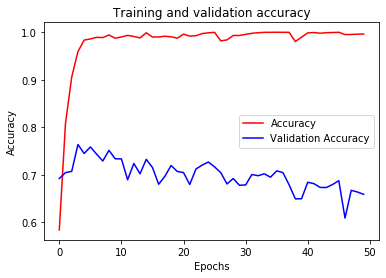

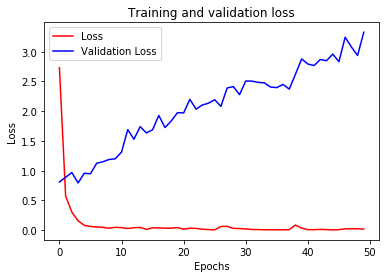

<Figure size 432x288 with 0 Axes>

In [0]:
plot_acc_loss(history1)

In [0]:
model1.evaluate(test_images,test_labels, verbose=1)

3020/3020 [==============================] - 0s 153us/sample - loss: 1874.7770 - accuracy: 0.5414


[1874.7769537717302, 0.5413907]

In [0]:
#Two CONV/ BatchNormalization/POOL and FULL

In [0]:
model3 = Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    BatchNormalization(),
    AveragePooling2D(),
    Conv2D(32,(3,3),activation='relu'),
    BatchNormalization(),
    AveragePooling2D(),
    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    AveragePooling2D(),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(6,activation='softmax')
])

model3.compile(loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])
filePath="/content/drive/My Drive/Colab Notebooks"
ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'model3.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
history3= model3.fit(train_data,labels,epochs=50,verbose=1,validation_split =.3,callbacks=[ch_point])



Train on 9888 samples, validate on 4238 samples
Epoch 1/50
9888/9888 [==============================] - 6s 625us/sample - loss: 2.6482 - accuracy: 0.5675 - val_loss: 2.0610 - val_accuracy: 0.3532
Epoch 2/50
9888/9888 [==============================] - 5s 542us/sample - loss: 0.7997 - accuracy: 0.7313 - val_loss: 1.2696 - val_accuracy: 0.6232
Epoch 3/50
9888/9888 [==============================] - 5s 540us/sample - loss: 0.5127 - accuracy: 0.8166 - val_loss: 1.1074 - val_accuracy: 0.6404
Epoch 4/50
9888/9888 [==============================] - 5s 547us/sample - loss: 0.3524 - accuracy: 0.8752 - val_loss: 1.0046 - val_accuracy: 0.6968
Epoch 5/50
9888/9888 [==============================] - 5s 549us/sample - loss: 0.2767 - accuracy: 0.9064 - val_loss: 0.8700 - val_accuracy: 0.7567
Epoch 6/50
9888/9888 [==============================] - 5s 508us/sample - loss: 0.2029 - accuracy: 0.9315 - val_loss: 1.4263 - val_accuracy: 0.6784
Epoch 7/50
9888/9888 [==============================] - 5s 505us

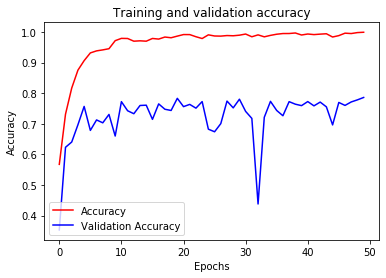

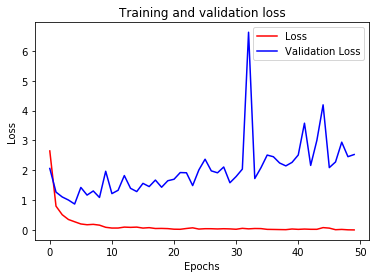

<Figure size 432x288 with 0 Axes>

In [0]:
plot_acc_loss(history3)

In [0]:
model3.evaluate(test_images,test_labels, verbose=1)

3020/3020 [==============================] - 1s 176us/sample - loss: 12594.8564 - accuracy: 0.2964


[12594.856362531043, 0.2963576]

In [0]:
#مدل بالا با تاثیر best weights=true

In [0]:
model3 = Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    BatchNormalization(),
    AveragePooling2D(),
    Conv2D(32,(3,3),activation='relu'),
    BatchNormalization(),
    AveragePooling2D(),
    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    AveragePooling2D(),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(6,activation='softmax')
])

model3.compile(loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])
filePath="/content/drive/My Drive/Colab Notebooks"
ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'model3.1.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=True, mode='auto', period=1)
history3= model3.fit(train_data,labels,epochs=50,verbose=1,validation_split =.3,callbacks=[ch_point])



Train on 9888 samples, validate on 4238 samples
Epoch 1/50
9888/9888 [==============================] - 6s 571us/sample - loss: 2.3912 - accuracy: 0.6018 - val_loss: 3.5591 - val_accuracy: 0.3889
Epoch 2/50
9888/9888 [==============================] - 5s 516us/sample - loss: 0.6856 - accuracy: 0.7768 - val_loss: 1.7402 - val_accuracy: 0.5819
Epoch 3/50
9888/9888 [==============================] - 5s 519us/sample - loss: 0.3571 - accuracy: 0.8687 - val_loss: 1.4531 - val_accuracy: 0.6727
Epoch 4/50
9888/9888 [==============================] - 5s 525us/sample - loss: 0.2541 - accuracy: 0.9111 - val_loss: 0.7417 - val_accuracy: 0.7853
Epoch 5/50
9888/9888 [==============================] - 5s 511us/sample - loss: 0.1808 - accuracy: 0.9365 - val_loss: 1.0407 - val_accuracy: 0.7581
Epoch 6/50
9888/9888 [==============================] - 5s 509us/sample - loss: 0.1381 - accuracy: 0.9535 - val_loss: 1.2312 - val_accuracy: 0.7506
Epoch 7/50
9888/9888 [==============================] - 5s 504us

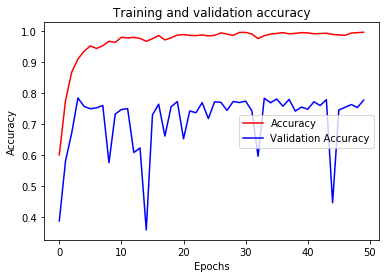

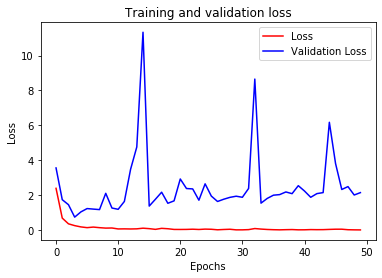

<Figure size 432x288 with 0 Axes>

In [0]:
plot_acc_loss(history3)

In [0]:
model3.evaluate(test_images,test_labels, verbose=1)

3020/3020 [==============================] - 1s 171us/sample - loss: 22729.4616 - accuracy: 0.3119


[22729.461579056293, 0.31192052]

In [0]:
#مدل بالا با تاثیر epoch کمتر

In [0]:
model3 = Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    BatchNormalization(),
    AveragePooling2D(),
    Conv2D(32,(3,3),activation='relu'),
    BatchNormalization(),
    AveragePooling2D(),
    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    AveragePooling2D(),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(6,activation='softmax')
])

model3.compile(loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])
filePath="/content/drive/My Drive/Colab Notebooks"
ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'model3.2.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=True, mode='auto', period=1)
history3= model3.fit(train_data,labels,epochs=4,verbose=1,validation_split =.3,callbacks=[ch_point])



Train on 9888 samples, validate on 4238 samples
Epoch 1/4
9888/9888 [==============================] - 6s 574us/sample - loss: 2.2138 - accuracy: 0.5902 - val_loss: 5.2232 - val_accuracy: 0.3336
Epoch 2/4
9888/9888 [==============================] - 5s 516us/sample - loss: 0.6939 - accuracy: 0.7645 - val_loss: 1.0996 - val_accuracy: 0.6664
Epoch 3/4
9888/9888 [==============================] - 5s 516us/sample - loss: 0.3925 - accuracy: 0.8582 - val_loss: 0.9043 - val_accuracy: 0.7525
Epoch 4/4
9888/9888 [==============================] - 5s 503us/sample - loss: 0.2203 - accuracy: 0.9225 - val_loss: 0.9563 - val_accuracy: 0.7480


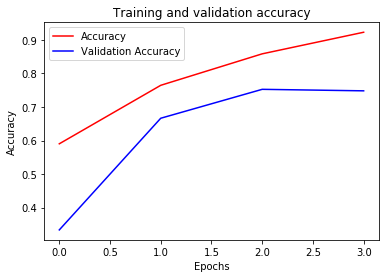

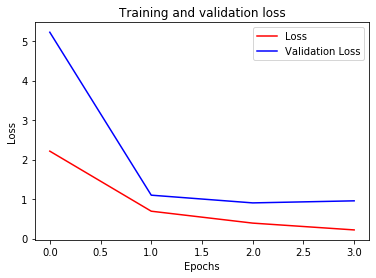

<Figure size 432x288 with 0 Axes>

In [0]:
plot_acc_loss(history3)

In [0]:
model3.evaluate(test_images,test_labels, verbose=1)

3020/3020 [==============================] - 1s 168us/sample - loss: 3395.6358 - accuracy: 0.3911


[3395.635786488514, 0.3910596]

In [0]:
#(2xCONV/Pool/Dropout)x3 + 2xFULL (Filter size increased)

In [0]:
model6 = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),
    
    Conv2D(64,(3,3),activation='relu'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),
    
    Conv2D(128,(3,3),activation='relu'),
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),
    
    Flatten(),
    
    Dense(1024,activation='relu'),
    Dropout(0.25),
    
    Dense(512,activation='relu'),
    Dropout(0.25),
    
    Dense(6,activation='softmax')
])

model6.compile(loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])
filePath="/content/drive/My Drive/Colab Notebooks"
ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'model6.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
history6= model6.fit(train_data,labels,epochs=10,verbose=1,validation_split =.3,callbacks=[ch_point])

Train on 9888 samples, validate on 4238 samples
Epoch 1/10
9888/9888 [==============================] - 29s 3ms/sample - loss: 1.2109 - accuracy: 0.5068 - val_loss: 0.8976 - val_accuracy: 0.6380
Epoch 2/10
9888/9888 [==============================] - 21s 2ms/sample - loss: 0.8727 - accuracy: 0.6449 - val_loss: 0.8252 - val_accuracy: 0.6727
Epoch 3/10
9888/9888 [==============================] - 21s 2ms/sample - loss: 0.7725 - accuracy: 0.6961 - val_loss: 0.6491 - val_accuracy: 0.7584
Epoch 4/10
9888/9888 [==============================] - 21s 2ms/sample - loss: 0.6416 - accuracy: 0.7628 - val_loss: 0.6345 - val_accuracy: 0.7659
Epoch 5/10
9888/9888 [==============================] - 19s 2ms/sample - loss: 0.5528 - accuracy: 0.7975 - val_loss: 0.6362 - val_accuracy: 0.7633
Epoch 6/10
9888/9888 [==============================] - 21s 2ms/sample - loss: 0.5108 - accuracy: 0.8063 - val_loss: 0.5776 - val_accuracy: 0.7907
Epoch 7/10
9888/9888 [==============================] - 19s 2ms/sample

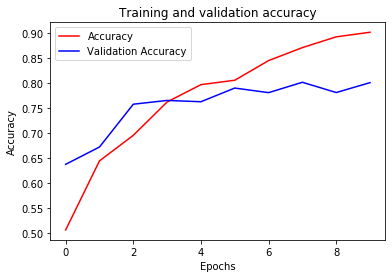

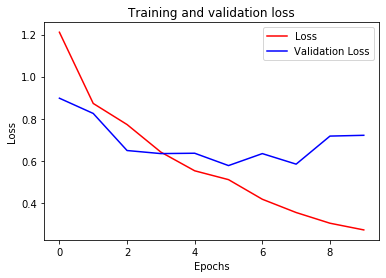

<Figure size 432x288 with 0 Axes>

In [0]:
plot_acc_loss(history6)

In [0]:
model6.evaluate(test_images,test_labels, verbose=1)

3020/3020 [==============================] - 2s 622us/sample - loss: 545.6413 - accuracy: 0.4096


[545.6412672030215, 0.40960264]

In [0]:
مدل بالا با کانولوشن بیشتر

In [0]:
model6 = Sequential([
    Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)),
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),
    
    Conv2D(256,(3,3),activation='relu'),
    Conv2D(512,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),
    
    Conv2D(1024,(3,3),activation='relu'),
    Conv2D(1024,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),
    
    Flatten(),
    
    Dense(1024,activation='relu'),
    Dropout(0.25),
    
    Dense(512,activation='relu'),
    Dropout(0.25),
    
    Dense(6,activation='softmax')
])

model6.compile(loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])
filePath="/content/drive/My Drive/Colab Notebooks"
ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'model6_convbishtar.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
history6= model6.fit(train_data,labels,epochs=10,verbose=1,validation_split =.3,callbacks=[ch_point])

ResourceExhaustedError: ignored

In [0]:
model7 = Sequential([
    Conv2D(256,(3,3),activation='relu',input_shape=(150,150,3)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),
    
    Conv2D(128,(3,3),activation='relu'),
    Conv2D(100,(3,3),activation='relu'),
    Conv2D(72,(3,3),activation='relu'),
    Conv2D(50,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),
    
    Flatten(),
    
    Dense(512,activation='relu'),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dropout(0.5),
    
    Dense(6,activation='softmax')
])
import tensorflow.keras.optimizers as Optimizer
model7.compile(loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])
ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'model7.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
history7= model7.fit(train_data,labels,epochs=10,verbose=1,validation_split =.3,callbacks=[ch_point])

Train on 9888 samples, validate on 4238 samples
Epoch 1/10
9888/9888 [==============================] - 52s 5ms/sample - loss: 1.2059 - accuracy: 0.5106 - val_loss: 0.9546 - val_accuracy: 0.6232
Epoch 2/10
9888/9888 [==============================] - 50s 5ms/sample - loss: 0.9201 - accuracy: 0.6294 - val_loss: 0.8355 - val_accuracy: 0.6487
Epoch 3/10
9888/9888 [==============================] - 50s 5ms/sample - loss: 0.7923 - accuracy: 0.6870 - val_loss: 0.8159 - val_accuracy: 0.6968
Epoch 4/10
9888/9888 [==============================] - 50s 5ms/sample - loss: 0.6661 - accuracy: 0.7458 - val_loss: 0.7175 - val_accuracy: 0.7485
Epoch 5/10
9888/9888 [==============================] - 50s 5ms/sample - loss: 0.5547 - accuracy: 0.7959 - val_loss: 0.7153 - val_accuracy: 0.7404
Epoch 6/10
9888/9888 [==============================] - 49s 5ms/sample - loss: 0.4072 - accuracy: 0.8533 - val_loss: 0.7443 - val_accuracy: 0.7614
Epoch 7/10
9888/9888 [==============================] - 49s 5ms/sample

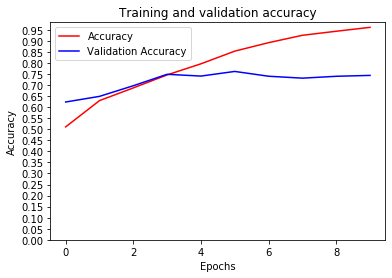

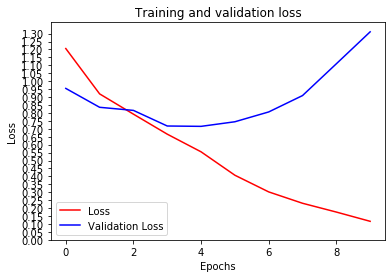

<Figure size 432x288 with 0 Axes>

In [0]:
plot_acc_loss(history7,relative=False)


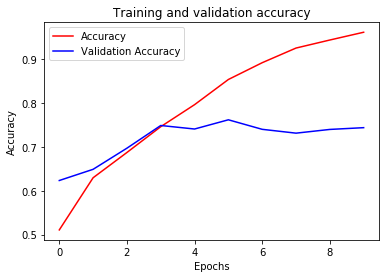

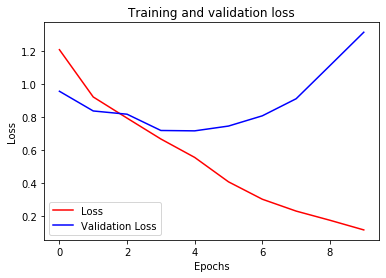

<Figure size 432x288 with 0 Axes>

In [0]:
plot_acc_loss(history7)


In [0]:
model7.evaluate(test_images,test_labels, verbose=1)

3020/3020 [==============================] - 5s 2ms/sample - loss: 581.9503 - accuracy: 0.4712


[581.9503292664787, 0.47119206]

In [0]:
#transfer learning

In [0]:
pre_trained_model10 = InceptionV3(input_shape=(150,150,3),
                                 include_top=False)
for layer in pre_trained_model10.layers[:300]:
  layer.trainable=False
  
model10 = Sequential([
    pre_trained_model10,
    GlobalAveragePooling2D(),
    Dense(4096,activation='relu'),
    Dense(2048,activation='relu'),
    Dense(1024,activation='relu'),
    Dropout(0.5),
    Dense(6,activation='softmax')
])


model10.compile(loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'model10.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
history10= model10.fit(train_data,labels,epochs=10,verbose=1,validation_split =.3,callbacks=[ch_point])

Train on 9888 samples, validate on 4238 samples
Epoch 1/10
9888/9888 [==============================] - 22s 2ms/sample - loss: 0.9661 - accuracy: 0.6451 - val_loss: 0.7419 - val_accuracy: 0.7808
Epoch 2/10
9888/9888 [==============================] - 18s 2ms/sample - loss: 0.6577 - accuracy: 0.7576 - val_loss: 0.6264 - val_accuracy: 0.7997
Epoch 3/10
9888/9888 [==============================] - 16s 2ms/sample - loss: 0.5891 - accuracy: 0.7832 - val_loss: 0.7648 - val_accuracy: 0.7588
Epoch 4/10
9888/9888 [==============================] - 16s 2ms/sample - loss: 0.5334 - accuracy: 0.8032 - val_loss: 0.9972 - val_accuracy: 0.7728
Epoch 5/10
9888/9888 [==============================] - 16s 2ms/sample - loss: 0.5066 - accuracy: 0.8090 - val_loss: 0.7101 - val_accuracy: 0.7843
Epoch 6/10
9888/9888 [==============================] - 16s 2ms/sample - loss: 0.4889 - accuracy: 0.8169 - val_loss: 0.8355 - val_accuracy: 0.8101
Epoch 7/10
9888/9888 [==============================] - 16s 2ms/sample

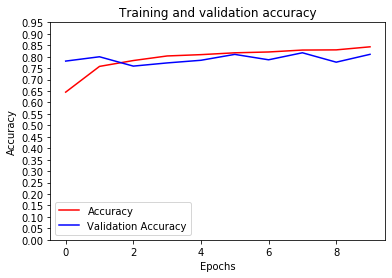

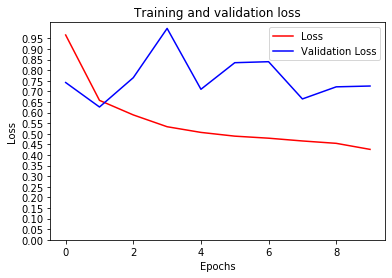

<Figure size 432x288 with 0 Axes>

In [0]:
plot_acc_loss(history10,relative=False)


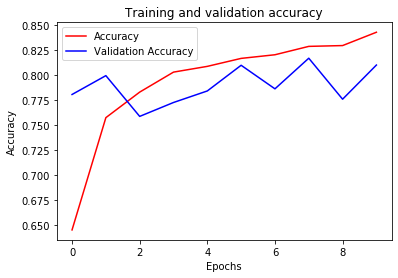

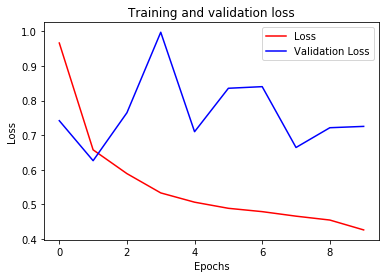

<Figure size 432x288 with 0 Axes>

In [0]:
plot_acc_loss(history10)


In [0]:
model10.evaluate(test_images,test_labels, verbose=1)

3020/3020 [==============================] - 4s 1ms/sample - loss: 76.3244 - accuracy: 0.3205


[76.32438695036024, 0.3205298]

In [0]:
#MobileNet

In [0]:
pre_trained_model_11 = MobileNet(input_shape=(150,150,3),
             include_top=False)
model11 = Sequential([
    
    pre_trained_model_11,
    GlobalAveragePooling2D(),
    Dense(4096,activation='relu'),
    Dense(2048,activation='relu'),
    Dense(1024,activation='relu'),
    Dropout(0.5),
    Dense(6,activation='softmax')
])
model11.layers[0].trainable = False
model11.compile(loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

ch_point=tf.keras.callbacks.ModelCheckpoint(filepath=  filePath + 'model11.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

history11= model11.fit(train_data,labels,epochs=10,verbose=1,validation_split =.3,callbacks=[ch_point])

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Train on 9888 samples, validate on 4238 samples
Epoch 1/10
9888/9888 [==============================] - 10s 994us/sample - loss: 0.6207 - accuracy: 0.7949 - val_loss: 0.5487 - val_accuracy: 0.8023
Epoch 2/10
9888/9888 [==============================] - 7s 705us/sample - loss: 0.3789 - accuracy: 0.8683 - val_loss: 0.6115 - val_accuracy: 0.8136
Epoch 3/10
9888/9888 [==============================] - 7s 704us/sample - loss: 0.3359 - accuracy: 0.8864 - val_loss: 0.6400 - val_accuracy: 0.8270
Epoch 4/10
9888/9888 [==============================] - 8s 782us/sample - loss: 0.2941 - accuracy: 0.8945 - val_loss: 0.4729 - val_accuracy: 0.8516
Epoch 5/10
9888/9888 [==============================] - 8s 761us/sample - loss: 0.2710 - accuracy: 0.9036 - val_loss: 0.4141 - val_accuracy: 0.8563
Epoch 6/10
9888/9888 [==============================] - 7s 696us/sample - loss: 0.2425 - accuracy: 0.9108 - val_loss: 0.7502 - val_accuracy: 0.7971
Epoch 7/10
9888/9888 [==============================] - 7s 692u

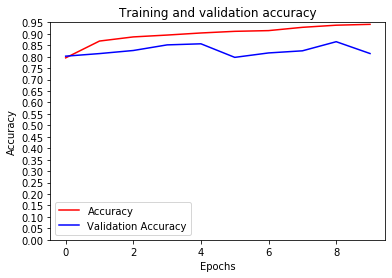

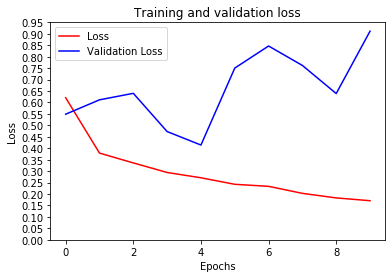

<Figure size 432x288 with 0 Axes>

In [0]:
plot_acc_loss(history11,relative=False)

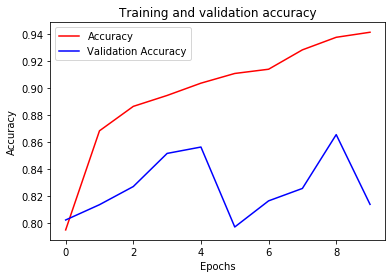

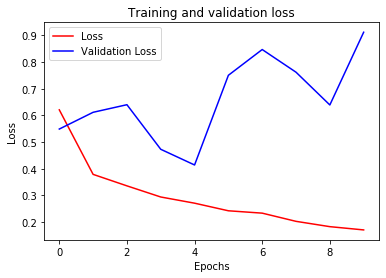

<Figure size 432x288 with 0 Axes>

In [0]:
plot_acc_loss(history11)


In [0]:
model11.evaluate(test_images,test_labels, verbose=1)

3020/3020 [==============================] - 2s 546us/sample - loss: 3.0285 - accuracy: 0.5076


[3.0284567765052746, 0.50761586]

In [0]:
#vgg

In [0]:
pre_trained_model_12 = VGG19(input_shape=(150,150,3),include_top=False)

model12 = Sequential([
    
    pre_trained_model_12,
    GlobalAveragePooling2D(),
    Dense(4096,activation='relu'),
    Dense(2048,activation='relu'),
    Dense(1024,activation='relu'),
    Dropout(0.5),
    Dense(6,activation='softmax')
])
model12.layers[0].trainable = False
model12.compile(loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'model12.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

history12= model12.fit(train_data,labels,epochs=10,verbose=1,validation_split =.3,callbacks=[ch_point])

80142336/80134624 [==============================] - 1s 0us/step
Train on 9888 samples, validate on 4238 samples
Epoch 1/10
9888/9888 [==============================] - 23s 2ms/sample - loss: 0.6067 - accuracy: 0.7671 - val_loss: 0.4808 - val_accuracy: 0.8195
Epoch 2/10
9888/9888 [==============================] - 23s 2ms/sample - loss: 0.4186 - accuracy: 0.8497 - val_loss: 0.4204 - val_accuracy: 0.8462
Epoch 3/10
9888/9888 [==============================] - 22s 2ms/sample - loss: 0.3842 - accuracy: 0.8623 - val_loss: 0.4754 - val_accuracy: 0.8410
Epoch 4/10
9888/9888 [==============================] - 23s 2ms/sample - loss: 0.3611 - accuracy: 0.8683 - val_loss: 0.3592 - val_accuracy: 0.8707
Epoch 5/10
9888/9888 [==============================] - 22s 2ms/sample - loss: 0.3333 - accuracy: 0.8796 - val_loss: 0.3880 - val_accuracy: 0.8643
Epoch 6/10
9888/9888 [==============================] - 22s 2ms/sample - loss: 0.3165 - accuracy: 0.8848 - val_loss: 0.4698 - val_accuracy: 0.8511
Epoch

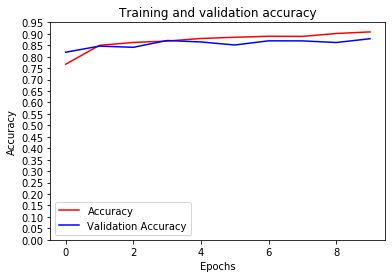

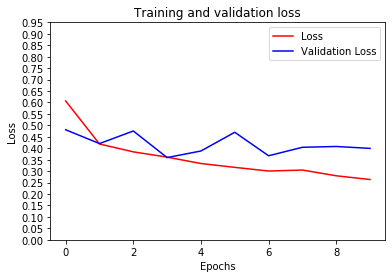

<Figure size 432x288 with 0 Axes>

In [0]:
plot_acc_loss(history12,relative=False)

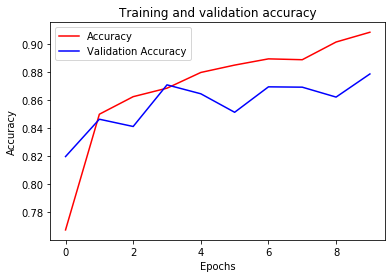

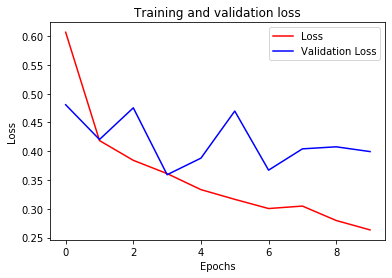

<Figure size 432x288 with 0 Axes>

In [0]:
plot_acc_loss(history12)

In [0]:
model12.evaluate(test_images,test_labels, verbose=1)

3020/3020 [==============================] - 5s 2ms/sample - loss: 130.1576 - accuracy: 0.5609


[130.15761512604772, 0.56092715]

In [0]:
#RESNET50

In [0]:
pre_trained_model_13 = ResNet50(input_shape=(150,150,3),include_top=False)

model13 = Sequential([
    
    pre_trained_model_13,
    GlobalAveragePooling2D(),
    Dense(4096,activation='relu'),
    Dense(2048,activation='relu'),
    Dense(1024,activation='relu'),
    Dropout(0.5),
    Dense(6,activation='softmax')
])
model13.layers[0].trainable = False
model13.compile(loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'model13.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

history13= model13.fit(train_data,labels,epochs=10,verbose=1,validation_split =.3,callbacks=[ch_point])

Train on 9888 samples, validate on 4238 samples
Epoch 1/10
9888/9888 [==============================] - 22s 2ms/sample - loss: 0.5178 - accuracy: 0.8387 - val_loss: 3.0288 - val_accuracy: 0.1597
Epoch 2/10
9888/9888 [==============================] - 19s 2ms/sample - loss: 0.3102 - accuracy: 0.8909 - val_loss: 2.2884 - val_accuracy: 0.1720
Epoch 3/10
9888/9888 [==============================] - 17s 2ms/sample - loss: 0.2762 - accuracy: 0.9041 - val_loss: 4.3079 - val_accuracy: 0.1597
Epoch 4/10
9888/9888 [==============================] - 17s 2ms/sample - loss: 0.2261 - accuracy: 0.9196 - val_loss: 2.9873 - val_accuracy: 0.1597
Epoch 5/10
9888/9888 [==============================] - 17s 2ms/sample - loss: 0.2024 - accuracy: 0.9288 - val_loss: 4.0553 - val_accuracy: 0.1597
Epoch 6/10
9888/9888 [==============================] - 17s 2ms/sample - loss: 0.1944 - accuracy: 0.9359 - val_loss: 4.3211 - val_accuracy: 0.1597
Epoch 7/10
9888/9888 [==============================] - 17s 2ms/sample

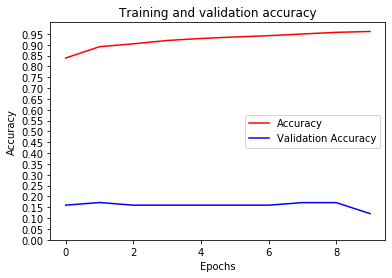

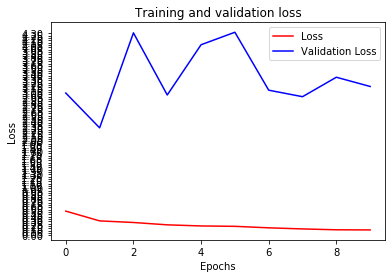

<Figure size 432x288 with 0 Axes>

In [0]:
plot_acc_loss(history13,relative=False)

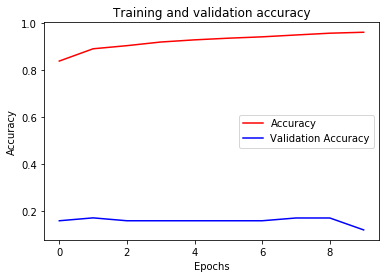

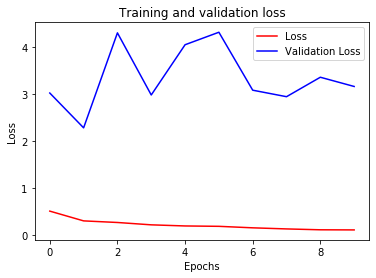

<Figure size 432x288 with 0 Axes>

In [0]:
plot_acc_loss(history13)

In [0]:
model13.evaluate(test_images,test_labels, verbose=1)

3020/3020 [==============================] - 4s 1ms/sample - loss: 4.6830 - accuracy: 0.5156


[4.683040510897605, 0.5155629]

# بالایی ها با سایز کمتر

In [0]:
#Pre-process data
def pre_process(path, image_size=30):
    """This function loads, resizes, standardizes and shuffles all images."""
    data = []
    labels = []
    for category in os.listdir(path):
        if(category == "buildings"):
            label = 0
        elif(category == "forest"):
            label = 1
        elif(category == "glacier"):
            label = 2  
        elif(category == "mountain"):
            label = 3  
        elif(category == "sea"):
            label = 4   
        elif(category == "street"):
            label = 5

        training_subfolder_path = path + "/" + category

        for file in os.listdir(training_subfolder_path):
            image_path = training_subfolder_path + "/" + file
            image = cv2.imread(image_path)

            #Resize all images so they all have the same size
            image = cv2.resize(image,(image_size, image_size))
            image = np.array(image)

            #Standardize data by dividing by 255
            image = image.astype('float32')/255.0
            data.append(image)
            labels.append(label)

    #Shuffle data
    data, labels = shuffle(data, labels)
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

In [0]:
train_data, labels = pre_process(TRAIN_PATH, image_size=30)

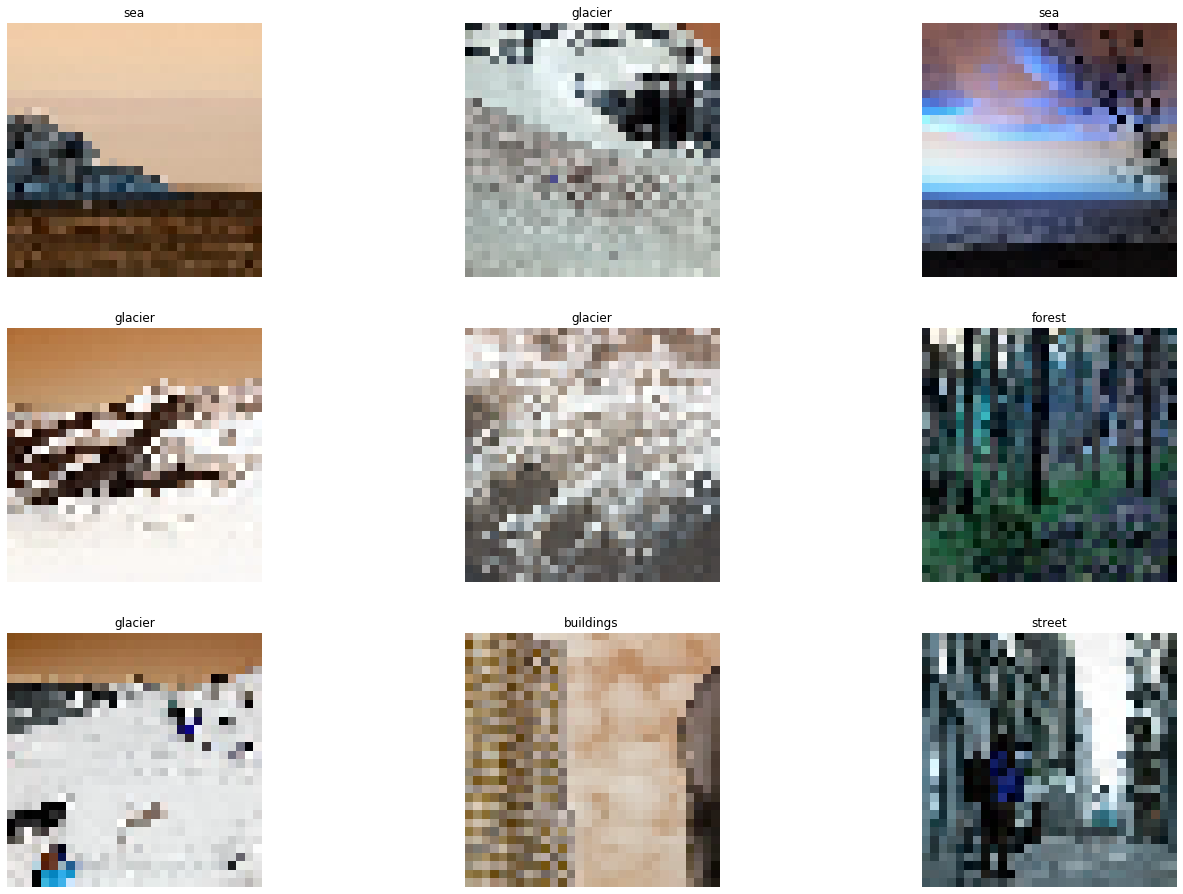

In [0]:
def get_classlabel(class_code):
  
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}  
    return labels[class_code]
# Plotting images with class labels.
f,ax = plt.subplots(3,3)
f.subplots_adjust(0,0,3,3)
for i in range(0,3,1):
    for j in range(0,3,1):
        rnd_number = randint(0,len(train_data))
        ax[i,j].imshow(train_data[rnd_number])
        ax[i,j].set_title(get_classlabel(labels[rnd_number]))
        ax[i,j].axis('off')

In [0]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label == 5
        elif labels == 'mountain':
            label == 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(30,30)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

In [0]:
test_images,test_labels = get_images('/content/drive/My Drive/alipouri  Dl Beheshti master(datadet)/intel_image_classification_dataset/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [0]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.applications import *
import tensorflow.keras.optimizers as Optimizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow import argmax
#from tensorflow.math import confusion_matrix as cm
#import tensorflow.math.confusion_matrix as cm
import tensorflow as tf

%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

import numpy as np
from pathlib import os

In [0]:
# PLOT LOSS AND ACCURACY
def plot_acc_loss(history, relative=True):
  acc=history.history['accuracy']
  val_acc=history.history['val_accuracy']
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs=range(len(acc)) 

  plt.plot(epochs, acc, 'r')
  plt.plot(epochs, val_acc, 'b')
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(["Accuracy", "Validation Accuracy"])
  plt.title('Training and validation accuracy')
  if relative==False:
    plt.yticks(np.arange(0, 1, step=0.05))
  plt.figure()

  plt.plot(epochs, loss, 'r')
  plt.plot(epochs, val_loss, 'b')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend(["Loss", "Validation Loss"])
  plt.title('Training and validation loss')
  if relative==False:
    y_max = max(loss) if max(loss)>max(val_loss) else max(val_loss)
    y_max = 1 if y_max < 1 else y_max
    plt.yticks(np.arange(0, y_max, step=0.05))
  plt.figure()

In [0]:
#Baseline model of one CONV, POOL and FULL layer

In [0]:

model1 = Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(30,30,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(6,activation='softmax')
])

filePath="/content/drive/My Drive/Colab Notebooks"
ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'model1.2.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model1.compile(loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

In [0]:
history1= model1.fit(train_data,labels,epochs=50,verbose=1,validation_split =.3,callbacks=[ch_point])

Train on 9888 samples, validate on 4238 samples
Epoch 1/50
9888/9888 [==============================] - 4s 442us/sample - loss: 1.0797 - accuracy: 0.5907 - val_loss: 0.8891 - val_accuracy: 0.6701
Epoch 2/50
9888/9888 [==============================] - 2s 168us/sample - loss: 0.7938 - accuracy: 0.7106 - val_loss: 0.7789 - val_accuracy: 0.7263
Epoch 3/50
9888/9888 [==============================] - 1s 128us/sample - loss: 0.6597 - accuracy: 0.7596 - val_loss: 0.8074 - val_accuracy: 0.7121
Epoch 4/50
9888/9888 [==============================] - 1s 127us/sample - loss: 0.5452 - accuracy: 0.8072 - val_loss: 0.7841 - val_accuracy: 0.7263
Epoch 5/50
9888/9888 [==============================] - 1s 125us/sample - loss: 0.4521 - accuracy: 0.8414 - val_loss: 0.7809 - val_accuracy: 0.7270
Epoch 6/50
9888/9888 [==============================] - 1s 131us/sample - loss: 0.3772 - accuracy: 0.8651 - val_loss: 0.8400 - val_accuracy: 0.7194
Epoch 7/50
9888/9888 [==============================] - 1s 132us

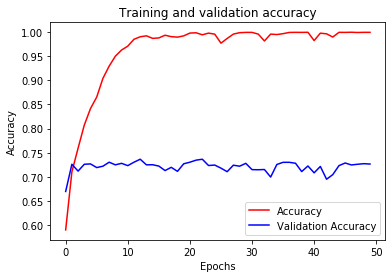

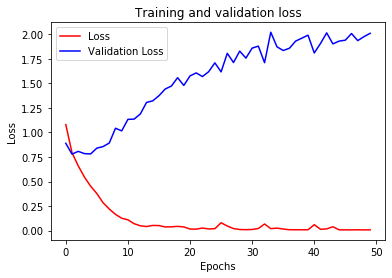

<Figure size 432x288 with 0 Axes>

In [0]:
plot_acc_loss(history1)

In [0]:
filePath="/content/drive/My Drive/Colab Notebooks"
from tensorflow.keras.models import load_model
model1 = load_model(filePath + 'model1.2.h5')

In [0]:
model1.evaluate(test_images,test_labels, verbose=1)

3020/3020 [==============================] - 0s 107us/sample - loss: 269.4321 - accuracy: 0.4682


[269.43212858288496, 0.46821192]

In [0]:
#(2xCONV/Pool/Dropout)x3 + 2xFULL (Filter size increased)

In [0]:
model6 = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(30,30,3)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),
    
    Conv2D(64,(3,3),activation='relu'),
    Conv2D(128,(3,3),activation='relu'),
    #MaxPooling2D(2,2),
    Dropout(0.2),
    
    Conv2D(128,(3,3),activation='relu'),
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),
    
    Flatten(),
    
    Dense(1024,activation='relu'),
    Dropout(0.25),
    
    Dense(512,activation='relu'),
    Dropout(0.25),
    
    Dense(6,activation='softmax')
])

model6.compile(loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])
filePath="/content/drive/My Drive/Colab Notebooks"
ch_point=keras.callbacks.ModelCheckpoint(filepath=  filePath + 'model6.2.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
history6= model6.fit(train_data,labels,epochs=10,verbose=1,validation_split =.3,callbacks=[ch_point])

Train on 9888 samples, validate on 4238 samples
Epoch 1/10
9888/9888 [==============================] - 6s 639us/sample - loss: 1.3773 - accuracy: 0.3941 - val_loss: 1.1326 - val_accuracy: 0.5429
Epoch 2/10
9888/9888 [==============================] - 2s 240us/sample - loss: 1.0797 - accuracy: 0.5560 - val_loss: 0.9875 - val_accuracy: 0.6034
Epoch 3/10
9888/9888 [==============================] - 2s 241us/sample - loss: 0.9615 - accuracy: 0.6272 - val_loss: 0.9115 - val_accuracy: 0.6682
Epoch 4/10
9888/9888 [==============================] - 2s 235us/sample - loss: 0.9066 - accuracy: 0.6602 - val_loss: 0.8352 - val_accuracy: 0.6956
Epoch 5/10
9888/9888 [==============================] - 2s 221us/sample - loss: 0.8344 - accuracy: 0.6986 - val_loss: 0.9266 - val_accuracy: 0.6534
Epoch 6/10
9888/9888 [==============================] - 2s 234us/sample - loss: 0.7899 - accuracy: 0.7144 - val_loss: 0.7437 - val_accuracy: 0.7272
Epoch 7/10
9888/9888 [==============================] - 2s 223us

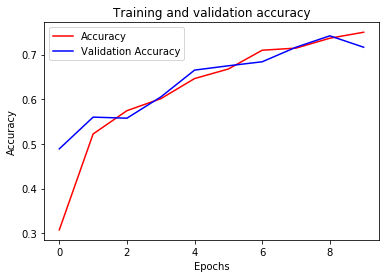

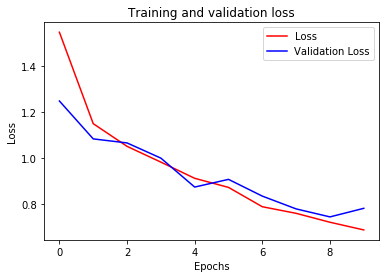

<Figure size 432x288 with 0 Axes>

In [0]:
plot_acc_loss(history6)

In [0]:
model6 = load_model(filePath + 'model6.2.h5')

In [0]:
model6.evaluate(test_images,test_labels, verbose=1)

3020/3020 [==============================] - 0s 149us/sample - loss: 178.8960 - accuracy: 0.4083


[178.8959613522157, 0.40827814]

In [0]:
#rnn

In [0]:
from __future__ import print_function

import tf.keras
from tf.keras.datasets import mnist
from tf.keras.models import Sequential
from tf.keras.layers import Dense, Activation
from tf.keras.layers import SimpleRNN
from tf.keras import initializers
from keras.optimizers import RMSprop   

batch_size = 32
num_classes = 6
epochs = 200
hidden_units = 100

learning_rate = 1e-6
clip_norm = 1.0

# the data, split between train and test sets
x_train=train_data[2826:]
x_valid=train_data[:2826]
x_test=test_images
y_train=labels[2826:]
y_valid=labels[:2826]
y_test=test_labels

x_train = x_train.reshape(x_train.shape[0], -1, 1)
x_test = x_test.reshape(x_test.shape[0], -1, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Evaluate IRNN...')
model = Sequential()
model.add(SimpleRNN(hidden_units,
                    kernel_initializer=initializers.RandomNormal(stddev=0.001),
                    recurrent_initializer=initializers.Identity(gain=1.0),
                    activation='relu',
                    input_shape=x_train.shape[1:]))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
rmsprop = RMSprop(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

scores = model.evaluate(x_test, y_test, verbose=0)
print('IRNN test score:', scores[0])
print('IRNN test accuracy:', scores[1])

ModuleNotFoundError: ignored